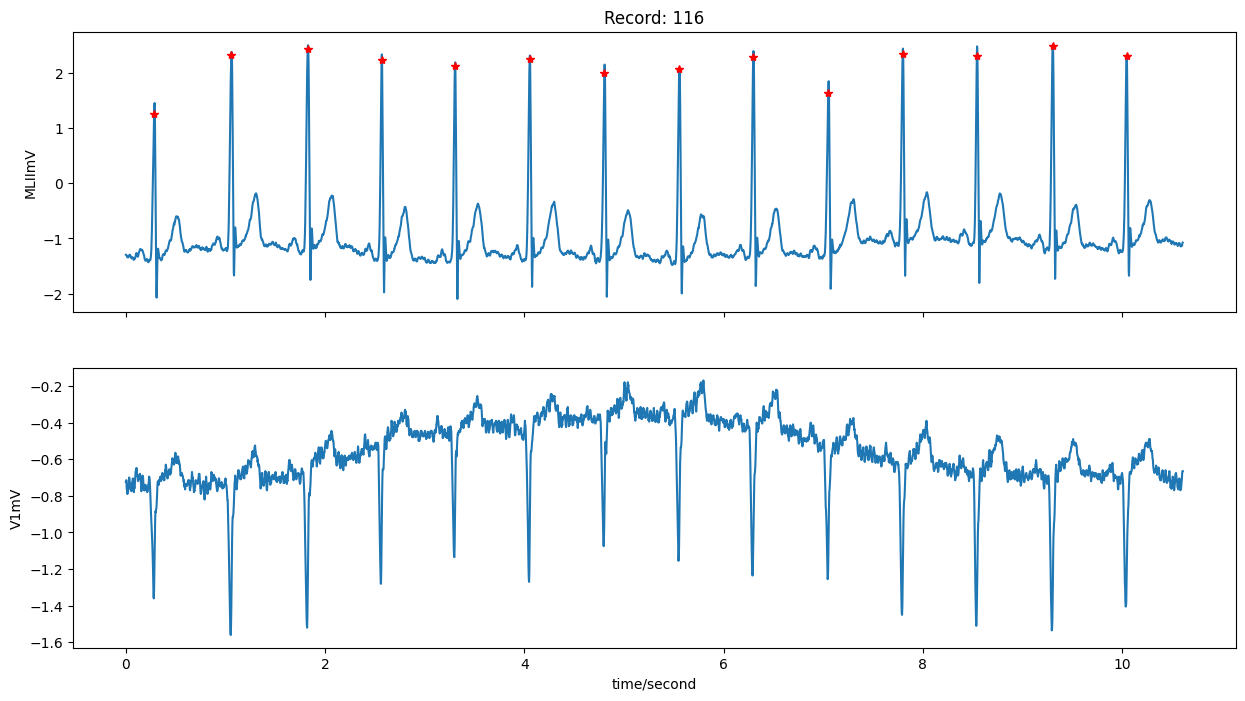

In [5]:
signal_number = 9
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filename = f'mit-bih-arrhythmia-database-1.0.0//{str(107 + signal_number)}'
record = wfdb.rdrecord(filename, sampfrom=180, sampto=4000,)    
annotation = wfdb.rdann(filename, 'atr', sampfrom=180, sampto=4000,shift_samps=True)

wfdb.plot_wfdb(record=record, annotation=annotation, time_units='seconds',figsize=(15,8))
     

In [2]:
import wfdb
import os
import numpy as np

dataset_dir = 'mit-bih-arrhythmia-database-1.0.0/'

record_numbers = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 200, 201, 202, 203, 205, 207, 208, 209, 210, 212, 213, 214, 215, 217, 219, 220, 221, 222, 223, 228, 230, 231, 232, 233, 234]

sampfrom = 180
sampto = 4000

annotations_dict = {}

for record_number in record_numbers:
    record_path = os.path.join(dataset_dir, str(record_number))

    try:
       
        annotation = wfdb.rdann(record_path, 'atr', sampfrom=sampfrom, sampto=sampto, shift_samps=True)
        
        annotation_symbols = annotation.symbol
        
        annotations_dict[record_number] = annotation_symbols
        
    except Exception as e:
        print(f"Error reading record {record_number}: {e}")

np.save('annotations_dict.npy', annotations_dict)

for record_number in annotations_dict:
    print(f"{record_number}: {annotations_dict[record_number]}")

loaded_annotations_dict = np.load('annotations_dict.npy', allow_pickle=True).item()
print(loaded_annotations_dict)


100: ['N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N', 'N', 'N', 'N']
101: ['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']
102: ['/', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/']
103: ['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']
104: ['/', '/', '/', '/', 'f', 'f', '/', '/', '/', '/', '/', 'f', 'f']
105: ['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']
106: ['+', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']
107: ['/', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/', '/']
108: ['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']
109: ['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']
111: ['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']
112: ['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']
113: ['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']
114: ['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']
115: ['N', 'N', 'N', 'N', 

In [3]:
import wfdb
import os
import numpy as np
import csv

dataset_dir = 'mit-bih-arrhythmia-database-1.0.0/'

record_numbers = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 200, 201, 202, 203, 205, 207, 208, 209, 210, 212, 213, 214, 215, 217, 219, 220, 221, 222, 223, 228, 230, 231, 232, 233, 234]

sampfrom = 180
sampto = 4000

annotations_dict = {}

for record_number in record_numbers:
    record_path = os.path.join(dataset_dir, str(record_number))

    try:
        
        annotation = wfdb.rdann(record_path, 'atr', sampfrom=sampfrom, sampto=sampto, shift_samps=True)
        
        annotation_symbols = annotation.symbol
        
        annotations_dict[record_number] = annotation_symbols
        
    except Exception as e:
        print(f"Error reading record {record_number}: {e}")

def determine_class(annotation_symbols):
    if 'A' in annotation_symbols:
        return 'A'
    elif all(symbol == 'N' for symbol in annotation_symbols):
        return 'N'
    elif (symbol == '/' for symbol in annotation_symbols):
        return 'A'
    elif (symbol == 'R' for symbol in annotation_symbols):
        return 'A'
    elif (symbol == 'L' for symbol in annotation_symbols):
        return 'A'
    elif (symbol == 'V' for symbol in annotation_symbols):
        return 'A'
    elif (symbol == 'f' for symbol in annotation_symbols):
        return 'A'
    else:
        return 'A'    

csv_records = []

for record_number, annotation_symbols in annotations_dict.items():
    record_class = determine_class(annotation_symbols)
    csv_records.append([record_number, record_class])

csv_file_path = 'annotations_classification.csv'
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Record Number', 'Class'])
    csv_writer.writerows(csv_records)

print(f"Annotations classification saved to {csv_file_path}")

import pandas as pd

df = pd.read_csv(csv_file_path)
print(df)


Annotations classification saved to annotations_classification.csv
    Record Number Class
0             100     A
1             101     N
2             102     A
3             103     N
4             104     A
5             105     N
6             106     A
7             107     A
8             108     N
9             109     A
10            111     A
11            112     N
12            113     N
13            114     N
14            115     N
15            116     N
16            117     N
17            118     A
18            119     A
19            121     N
20            122     N
21            123     N
22            124     A
23            200     A
24            201     N
25            202     A
26            203     A
27            205     N
28            207     A
29            208     A
30            209     N
31            210     A
32            212     A
33            213     N
34            214     A
35            215     N
36            217     A
37            219    

In [4]:
import wfdb
import os
import numpy as np
import pandas as pd

csv_file_path = 'annotations_classification.csv'
df = pd.read_csv(csv_file_path)

dataset_dir = 'mit-bih-arrhythmia-database-1.0.0/'

signals = []
labels = []

# Iterate through each record number and extract the signal data
for index, row in df.iterrows():
    record_number = row['Record Number']
    record_class = row['Class']
    record_path = os.path.join(dataset_dir, str(record_number))

    try:
        # Read the signal data
        record = wfdb.rdrecord(record_path, sampfrom=180, sampto=4000, channels=[0])
        signal = record.p_signal.flatten()
        
        # Normalize the signal
        signal = (signal - np.mean(signal)) / np.std(signal)
        
        # Append the signal and label to the lists
        signals.append(signal)
        labels.append(record_class)
        
    except Exception as e:
        print(f"Error reading record {record_number}: {e}")

signals = np.array(signals)
labels = np.array(labels)

print(f'Signals shape: {signals.shape}')
print(f'Labels shape: {labels.shape}')


Signals shape: (48, 3820)
Labels shape: (48,)


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Reshape the signals to add a channel dimension (needed for CNN)
signals_reshaped = signals[..., np.newaxis]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(signals_reshaped, labels_encoded, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (38, 3820, 1)
X_test shape: (10, 3820, 1)
y_train shape: (38,)
y_test shape: (10,)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3818, 32)          128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 1909, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 1909, 32)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1907, 64)          6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 953, 64)           0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 953, 64)           0

Epoch 1/20
2/2 [==============================] - 3s 1s/step - loss: 1.3125 - accuracy: 0.3947 - val_loss: 1.1882 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 1s 250ms/step - loss: 1.3992 - accuracy: 0.5789 - val_loss: 0.7457 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 1s 241ms/step - loss: 0.6088 - accuracy: 0.8158 - val_loss: 0.9376 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 1s 250ms/step - loss: 0.4018 - accuracy: 0.8421 - val_loss: 0.8528 - val_accuracy: 0.6000
Epoch 5/20
2/2 [==============================] - 1s 236ms/step - loss: 0.1569 - accuracy: 0.9474 - val_loss: 0.8539 - val_accuracy: 0.3000
Epoch 6/20
2/2 [==============================] - 1s 224ms/step - loss: 0.0623 - accuracy: 1.0000 - val_loss: 0.8958 - val_accuracy: 0.4000
Epoch 7/20
2/2 [==============================] - 1s 220ms/step - loss: 0.1997 - accuracy: 0.9211 - val_loss: 0.9338 - val_accuracy: 0.4000
Epoch 8/20
2/2 [=======

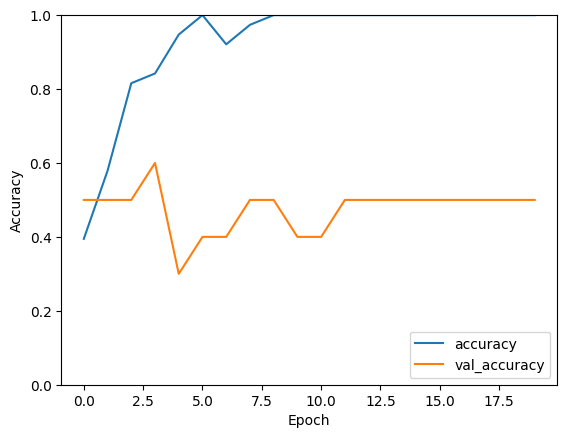

1/1 - 0s - loss: 1.4332 - accuracy: 0.5000 - 55ms/epoch - 55ms/step

Test accuracy: 0.5


In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


In [8]:
# Save the trained model
model.save('ecg_cnn_model1.keras')

In [11]:
import wfdb
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('ecg_cnn_model1.keras')

# Function to preprocess a new ECG signal
def preprocess_signal(record_path, sampfrom=180, sampto=4000, channel=0):
    try:
        # Read the signal data
        record = wfdb.rdrecord(record_path, sampfrom=sampfrom, sampto=sampto, channels=[channel])
        signal = record.p_signal.flatten()

        # Normalize the signal
        signal = (signal - np.mean(signal)) / np.std(signal)

        # Reshape the signal to add a channel dimension
        signal = signal[np.newaxis, ..., np.newaxis]

        return signal
    except Exception as e:
        print(f"Error reading record {record_path}: {e}")
        return None

# Function to predict whether an ECG signal is normal "N" or arrhythmic "A"
def predict_signal_class(record_path):
    signal = preprocess_signal(record_path)
    if signal is not None:
        prediction = model.predict(signal)
        predicted_class = (prediction > 0.5).astype("int32")  # Binary classification

        # Map the prediction to the class label
        class_label = 'A' if predicted_class[0][0] == 0 else 'N'
        return class_label
    else:
        return None

# Example usage
ECG_Signal_Name = 'I36'  # Provide the name of the ECG signal file
dataset_dir = 'st-petersburg-incart-12-lead-arrhythmia-database-1.0.0//'
record_path = os.path.join(dataset_dir, ECG_Signal_Name)

predicted_class = predict_signal_class(record_path)
print(f'Record {ECG_Signal_Name} is predicted to be: {predicted_class}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Record I36 is predicted to be: N


In [5]:
import wfdb
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('ecg_cnn_model1.keras')

def preprocess_signal(record_path, sampfrom=180, sampto=4000, channel=0):
    try:
       
        record = wfdb.rdrecord(record_path, sampfrom=sampfrom, sampto=sampto, channels=[channel])
        signal = record.p_signal.flatten()

        signal = (signal - np.mean(signal)) / np.std(signal)

        signal = signal[np.newaxis, ..., np.newaxis]

        return signal
    except Exception as e:
        print(f"Error reading record {record_path}: {e}")
        return None

# Function to predict whether an ECG signal is normal "N" or arrhythmic "A"
def predict_signal_class(record_path):
    signal = preprocess_signal(record_path)
    if signal is not None:
        prediction = model.predict(signal)
        predicted_class = (prediction > 0.5).astype("int32")  # Binary classification

        class_label = 'N' if predicted_class[0][0] == 0 else 'A'
        return class_label
    else:
        return None


record_number = 117  
dataset_dir = 'mit-bih-arrhythmia-database-1.0.0//'
record_path = os.path.join(dataset_dir, str(record_number))

predicted_class = predict_signal_class(record_path)
print(f'Record {record_number} is predicted to be: {predicted_class}')


1/1 [==============================] - 0s 125ms/step
Record 117 is predicted to be: N


In [2]:
actual_labels = {
    100: 'A', 101: 'N', 102: 'A', 103: 'N', 104: 'A', 105: 'N',
    106: 'A', 107: 'A', 108: 'N', 109: 'A', 111: 'A', 112: 'N',
    113: 'N', 114: 'N', 115: 'N', 116: 'N', 117: 'N', 118: 'A',
    119: 'A', 121: 'N', 122: 'N', 123: 'N', 124: 'A', 200: 'A',
    201: 'N', 202: 'A', 203: 'A', 205: 'N', 207: 'A', 208: 'A',
    209: 'N', 210: 'A', 212: 'A', 213: 'N', 214: 'A', 215: 'N',
    217: 'A', 219: 'A', 220: 'N', 221: 'A', 222: 'N', 223: 'N',
    228: 'N', 230: 'A', 231: 'A', 232: 'A', 233: 'A', 234: 'N'
}

1/1 [==============================] - 0s 24ms/step


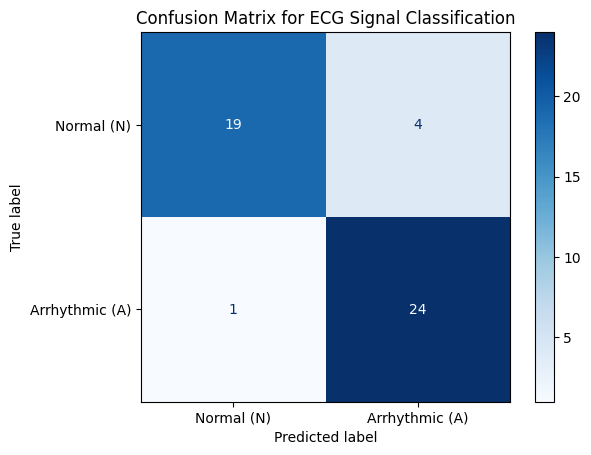

In [11]:
import wfdb
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('ecg_cnn_model1.keras')

# Function to preprocess a new ECG signal
def preprocess_signal(record_path, sampfrom=180, sampto=4000, channel=0):
    try:
        # Read the signal data
        record = wfdb.rdrecord(record_path, sampfrom=sampfrom, sampto=sampto, channels=[channel])
        signal = record.p_signal.flatten()

        # Normalize the signal
        signal = (signal - np.mean(signal)) / np.std(signal)

        # Reshape the signal to add a channel dimension
        signal = signal[np.newaxis, ..., np.newaxis]

        return signal
    except Exception as e:
        print(f"Error reading record {record_path}: {e}")
        return None

# Function to predict whether an ECG signal is normal "N" or arrhythmic "A"
def predict_signal_class(record_path):
    signal = preprocess_signal(record_path)
    if signal is not None:
        prediction = model.predict(signal)
        predicted_class = (prediction > 0.5).astype("int32")  # Binary classification

        # Map the prediction to the class label
        class_label = 'N' if predicted_class[0][0] == 0 else 'A'
        return class_label
    else:
        return None

# Define actual labels for the records
actual_labels = {
    100: 'A', 101: 'N', 102: 'A', 103: 'N', 104: 'A', 105: 'N',
    106: 'A', 107: 'A', 108: 'N', 109: 'A', 111: 'A', 112: 'N',
    113: 'N', 114: 'N', 115: 'N', 116: 'N', 117: 'N', 118: 'A',
    119: 'A', 121: 'N', 122: 'N', 123: 'N', 124: 'A', 200: 'A',
    201: 'N', 202: 'A', 203: 'A', 205: 'N', 207: 'A', 208: 'A',
    209: 'N', 210: 'A', 212: 'A', 213: 'N', 214: 'A', 215: 'N',
    217: 'A', 219: 'A', 220: 'N', 221: 'A', 222: 'N', 223: 'N',
    228: 'N', 230: 'A', 231: 'A', 232: 'A', 233: 'A', 234: 'N'
}

# Create lists to store the actual and predicted labels
y_true = []
y_pred = []

dataset_dir = 'mit-bih-arrhythmia-database-1.0.0/'

for record_number, actual_label in actual_labels.items():
    record_path = os.path.join(dataset_dir, str(record_number))
    predicted_class = predict_signal_class(record_path)
    
    if predicted_class is not None:
        y_true.append(actual_label)
        y_pred.append(predicted_class)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['N', 'A'])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal (N)', 'Arrhythmic (A)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for ECG Signal Classification")
plt.show()


1/1 [==============================] - 0s 38ms/step


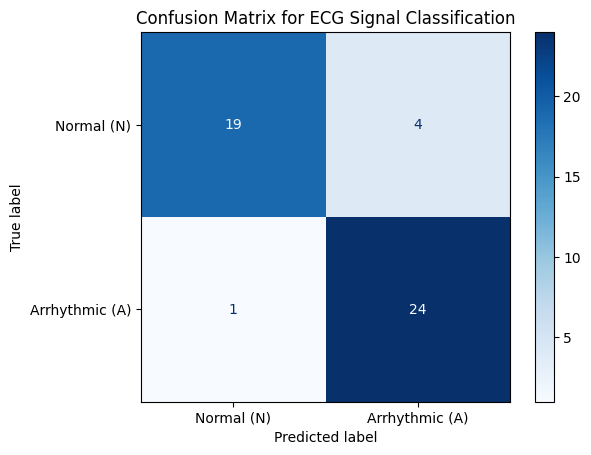

                precision    recall  f1-score   support

    Normal (N)       0.95      0.83      0.88        23
Arrhythmic (A)       0.86      0.96      0.91        25

      accuracy                           0.90        48
     macro avg       0.90      0.89      0.89        48
  weighted avg       0.90      0.90      0.90        48



In [12]:
import wfdb
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('ecg_cnn_model1.keras')

# Function to preprocess a new ECG signal
def preprocess_signal(record_path, sampfrom=180, sampto=4000, channel=0):
    try:
        # Read the signal data
        record = wfdb.rdrecord(record_path, sampfrom=sampfrom, sampto=sampto, channels=[channel])
        signal = record.p_signal.flatten()

        # Normalize the signal
        signal = (signal - np.mean(signal)) / np.std(signal)

        # Reshape the signal to add a channel dimension
        signal = signal[np.newaxis, ..., np.newaxis]

        return signal
    except Exception as e:
        print(f"Error reading record {record_path}: {e}")
        return None

# Function to predict whether an ECG signal is normal "N" or arrhythmic "A"
def predict_signal_class(record_path):
    signal = preprocess_signal(record_path)
    if signal is not None:
        prediction = model.predict(signal)
        predicted_class = (prediction > 0.5).astype("int32")  # Binary classification

        # Map the prediction to the class label
        class_label = 'N' if predicted_class[0][0] == 0 else 'A'
        return class_label
    else:
        return None

# Define actual labels for the records
actual_labels = {
    100: 'A', 101: 'N', 102: 'A', 103: 'N', 104: 'A', 105: 'N',
    106: 'A', 107: 'A', 108: 'N', 109: 'A', 111: 'A', 112: 'N',
    113: 'N', 114: 'N', 115: 'N', 116: 'N', 117: 'N', 118: 'A',
    119: 'A', 121: 'N', 122: 'N', 123: 'N', 124: 'A', 200: 'A',
    201: 'N', 202: 'A', 203: 'A', 205: 'N', 207: 'A', 208: 'A',
    209: 'N', 210: 'A', 212: 'A', 213: 'N', 214: 'A', 215: 'N',
    217: 'A', 219: 'A', 220: 'N', 221: 'A', 222: 'N', 223: 'N',
    228: 'N', 230: 'A', 231: 'A', 232: 'A', 233: 'A', 234: 'N'
}

# Create lists to store the actual and predicted labels
y_true = []
y_pred = []

dataset_dir = 'mit-bih-arrhythmia-database-1.0.0/'

for record_number, actual_label in actual_labels.items():
    record_path = os.path.join(dataset_dir, str(record_number))
    predicted_class = predict_signal_class(record_path)
    
    if predicted_class is not None:
        y_true.append(actual_label)
        y_pred.append(predicted_class)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['N', 'A'])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal (N)', 'Arrhythmic (A)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for ECG Signal Classification")
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, labels=['N', 'A'], target_names=['Normal (N)', 'Arrhythmic (A)']))


In [13]:
import numpy as np
import pandas 

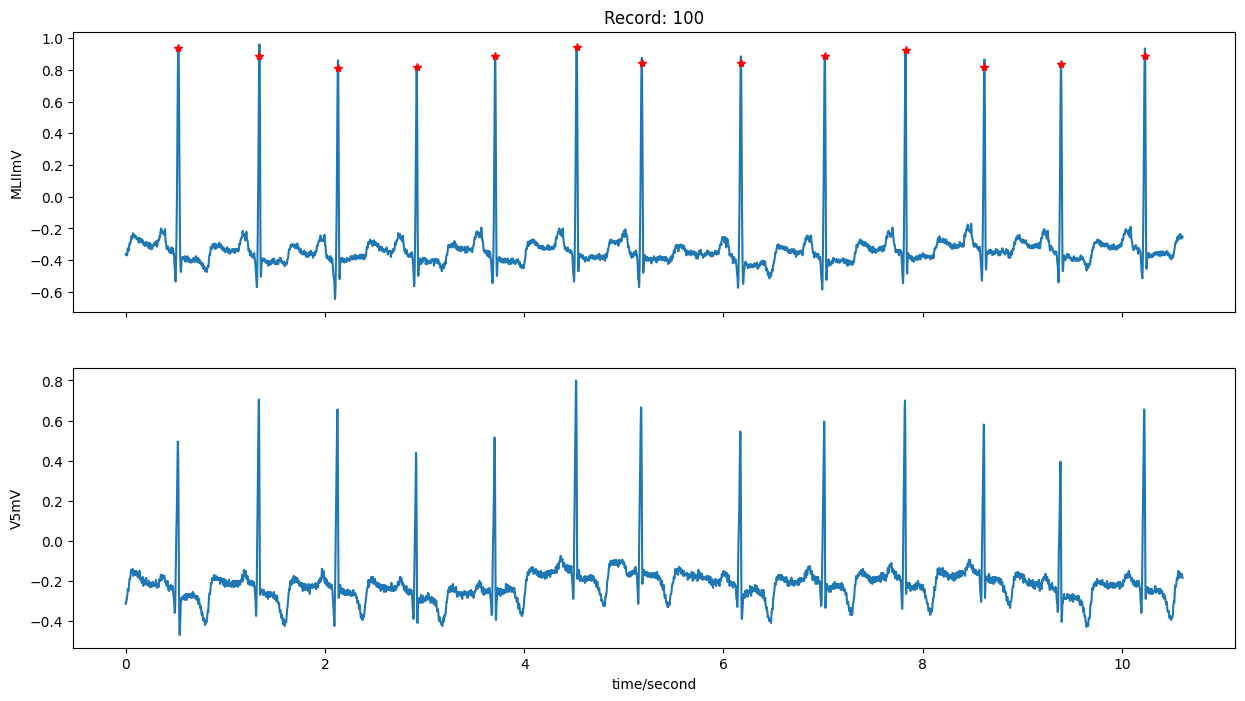

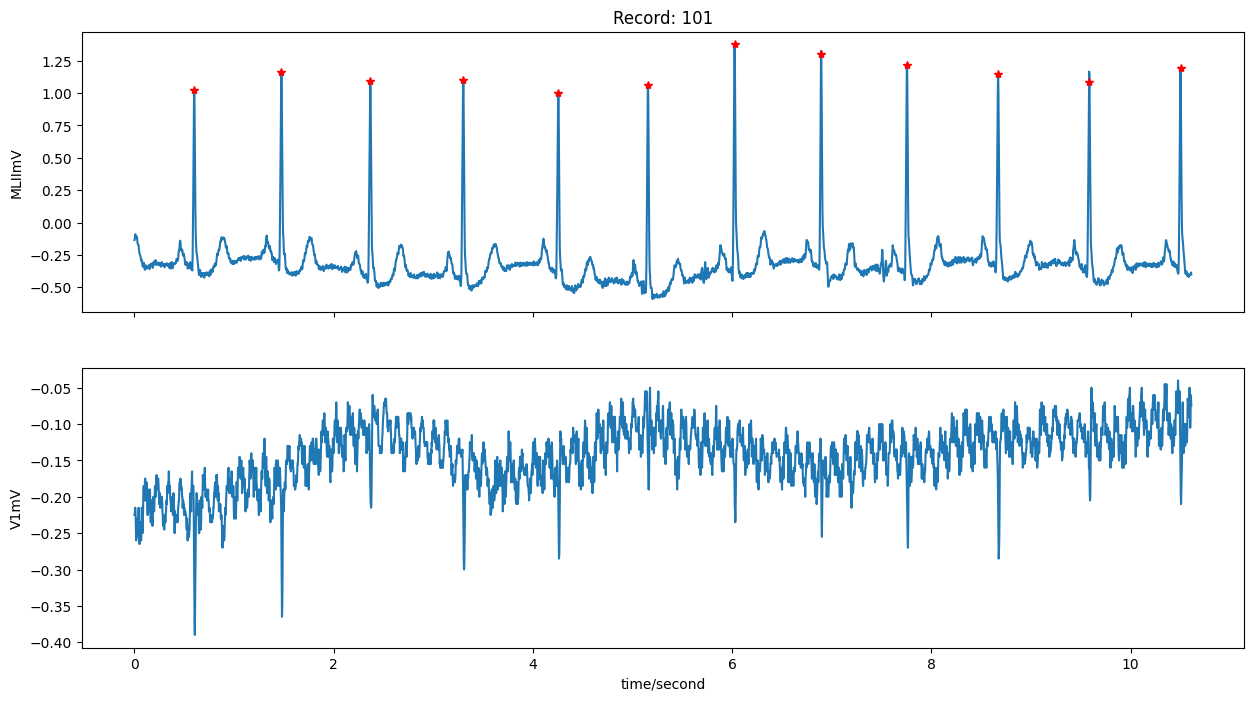

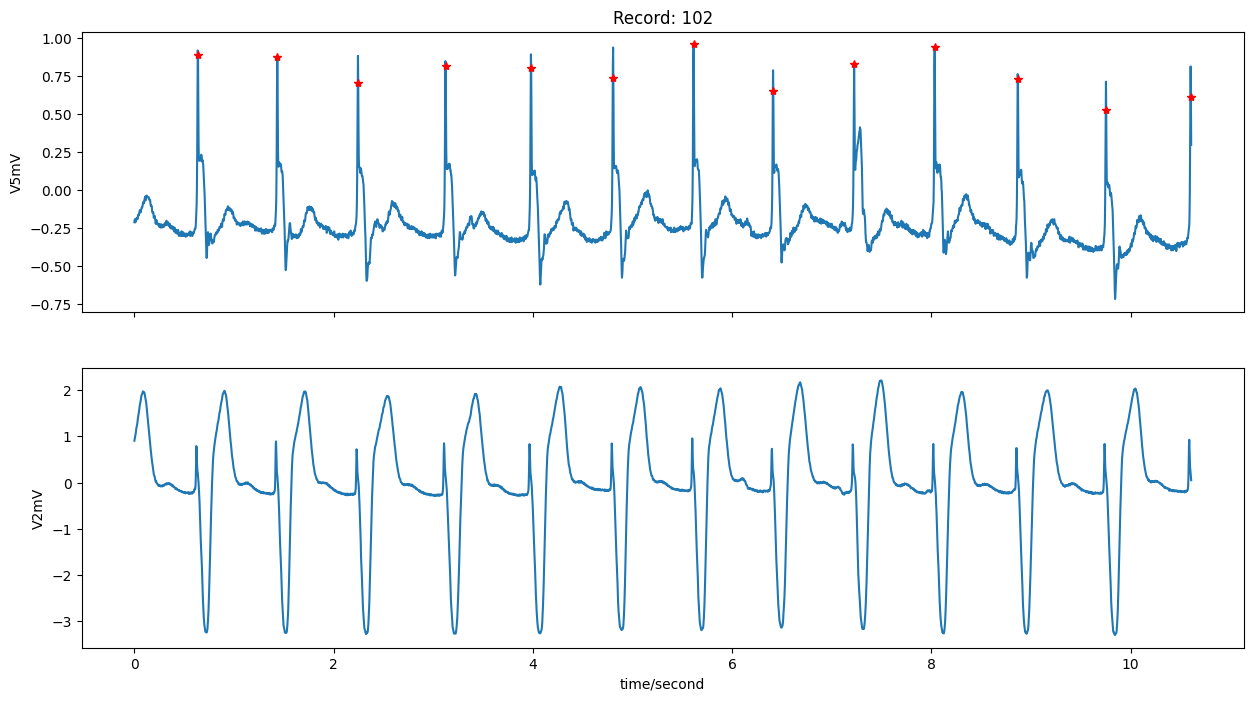

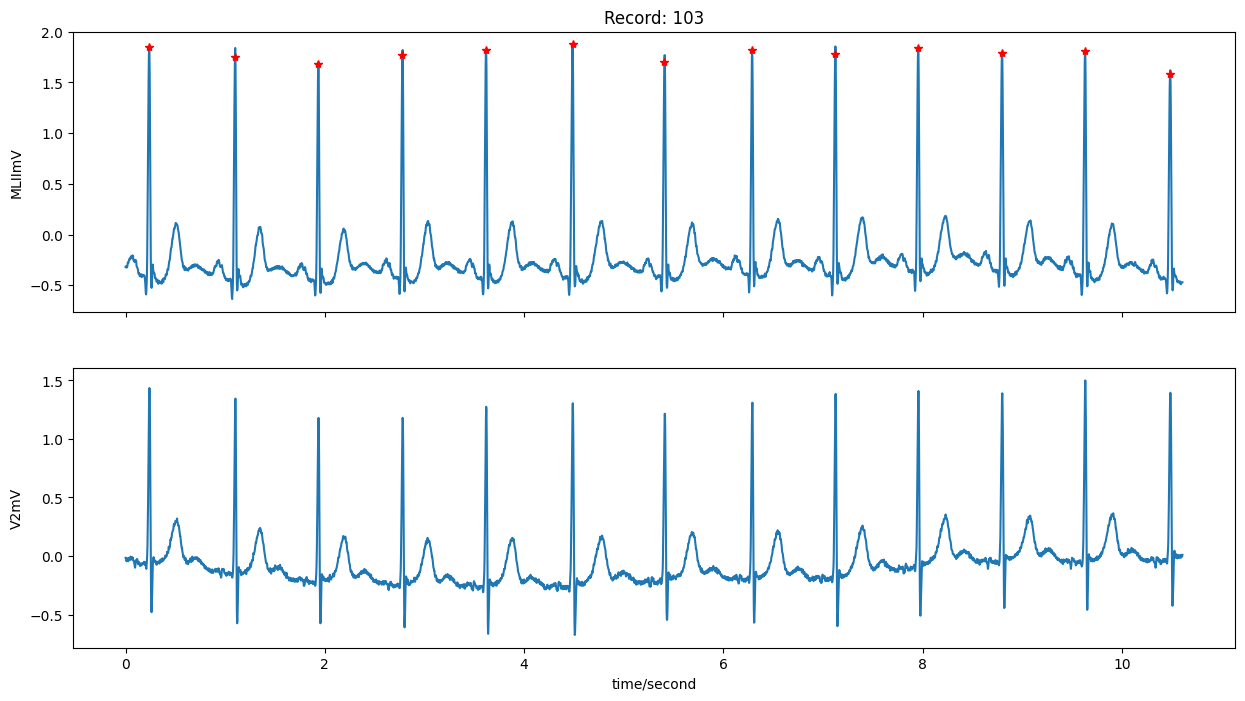

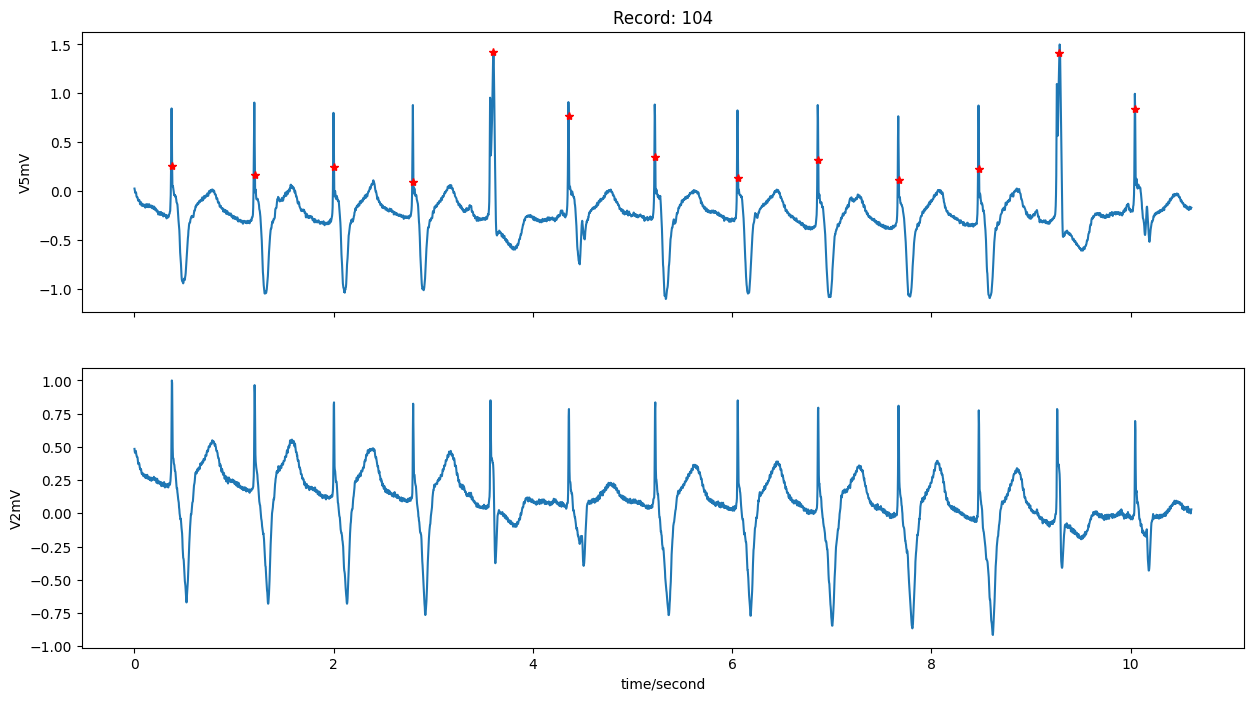

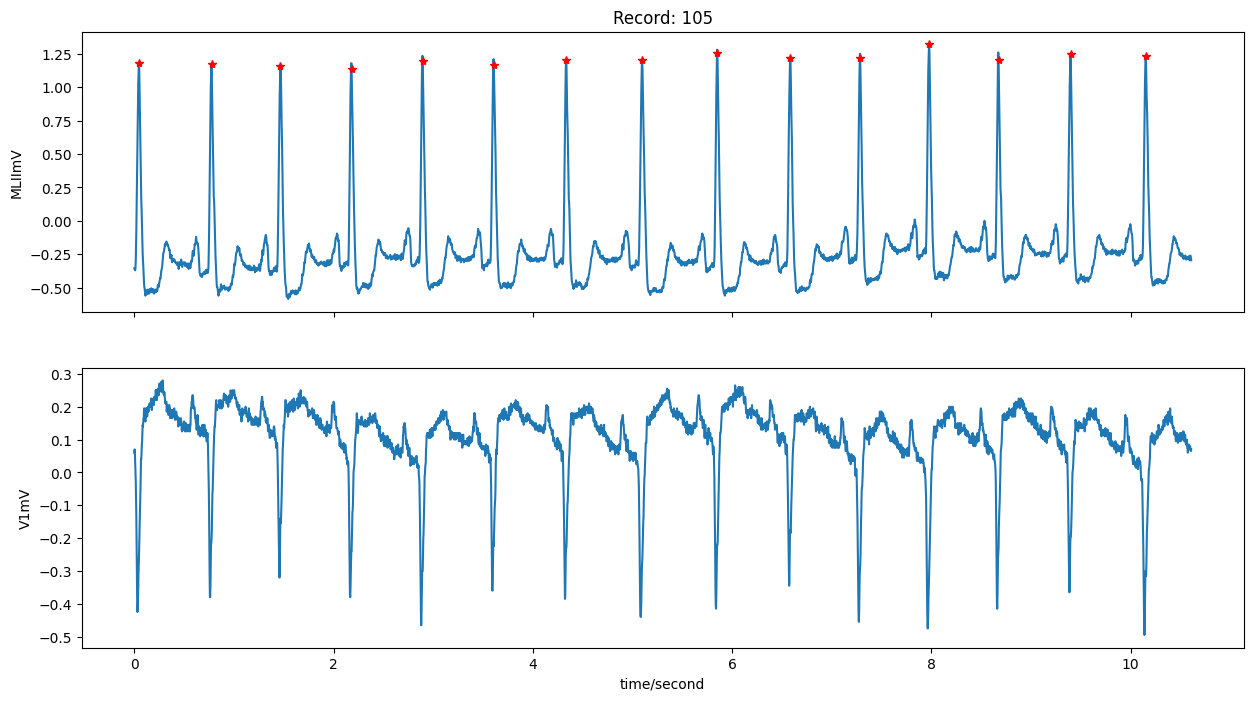

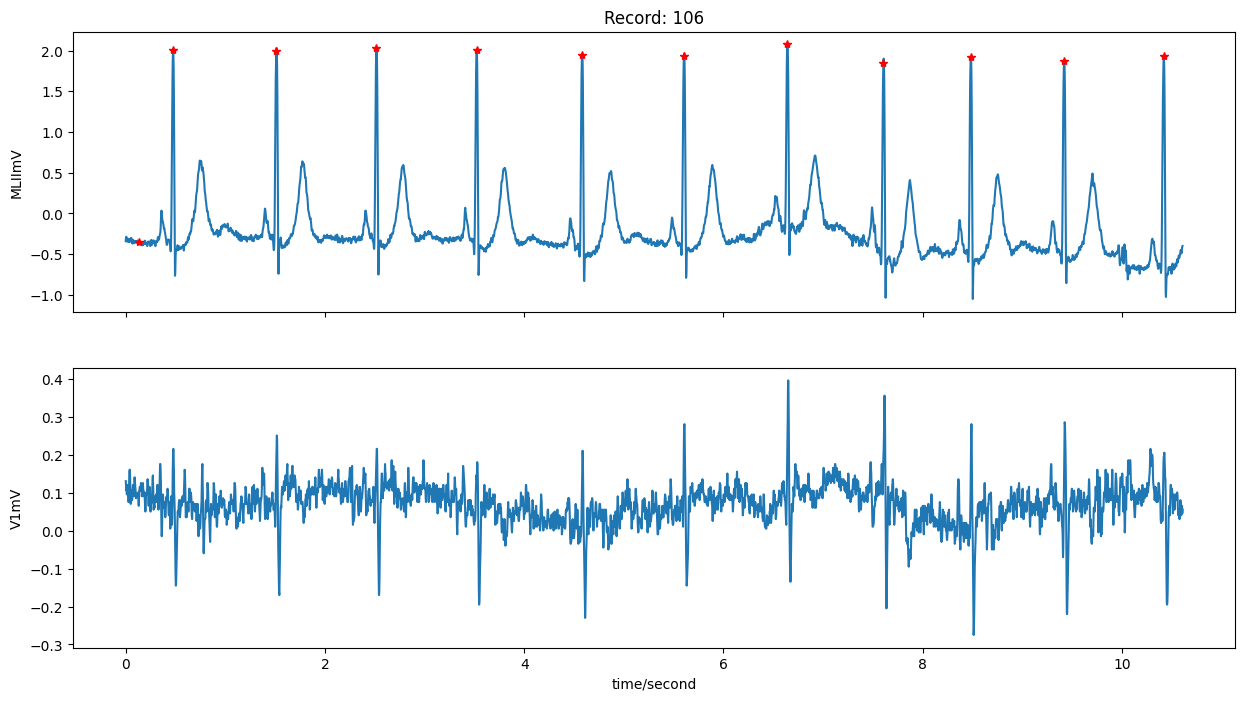

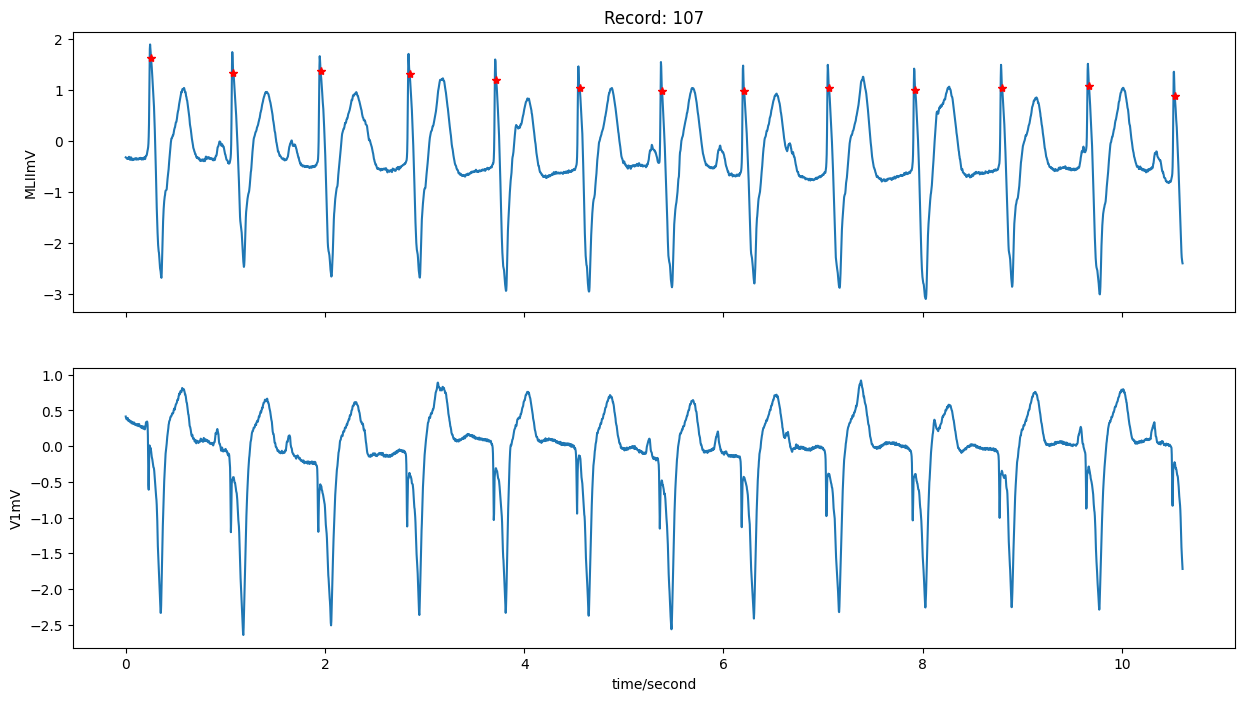

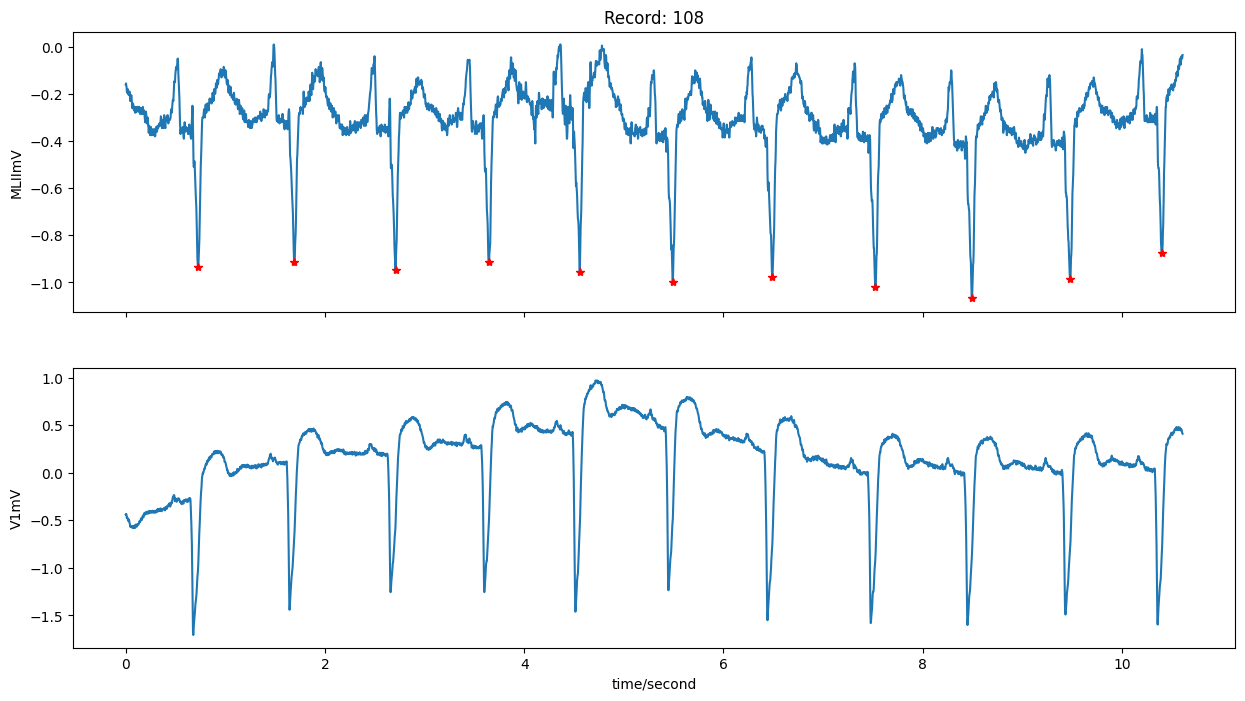

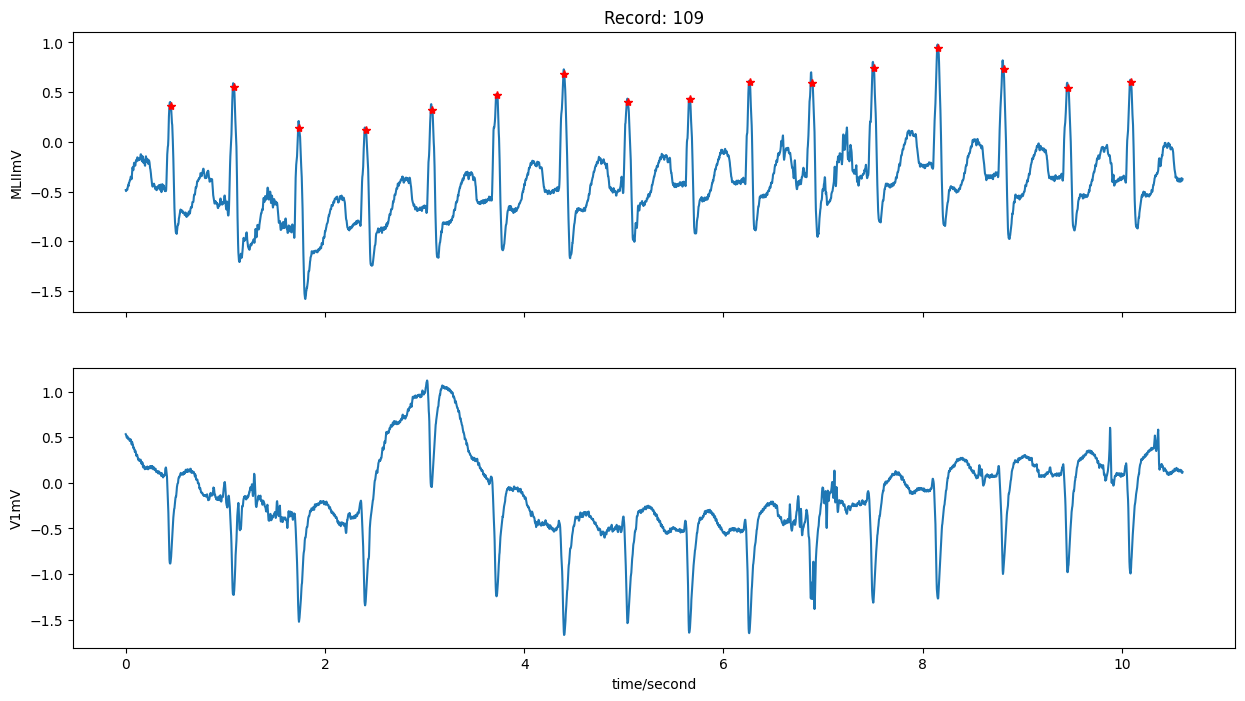

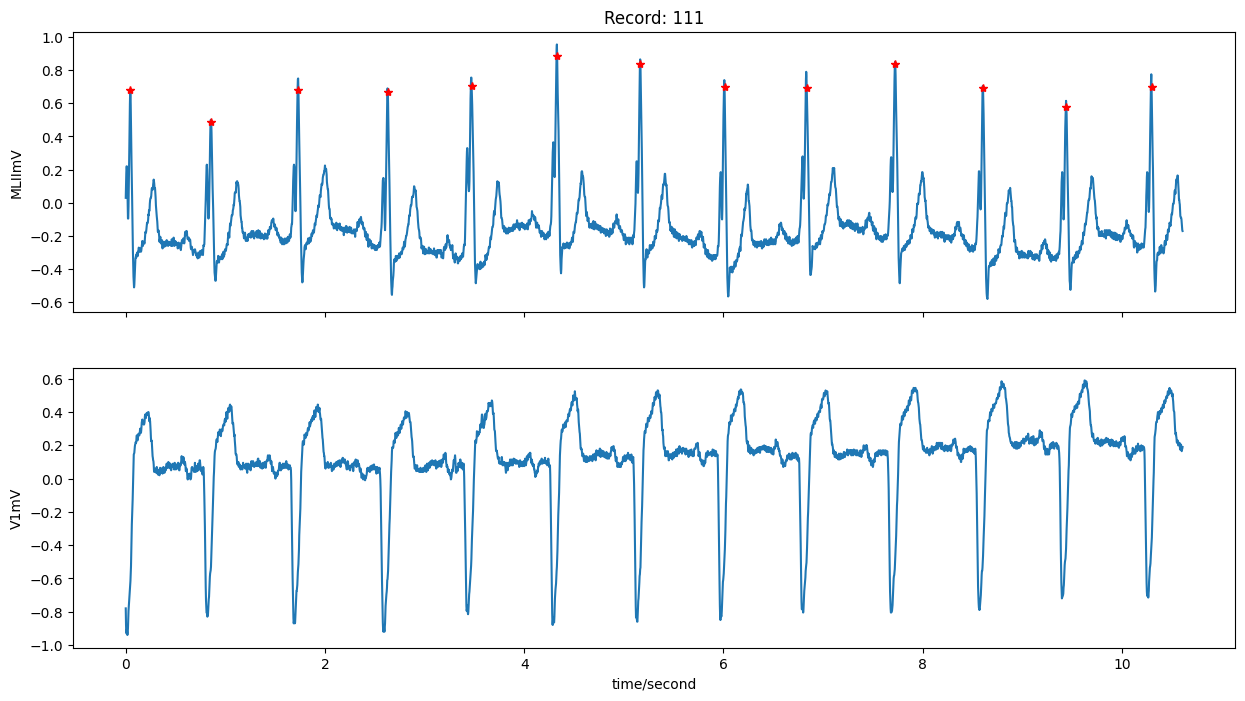

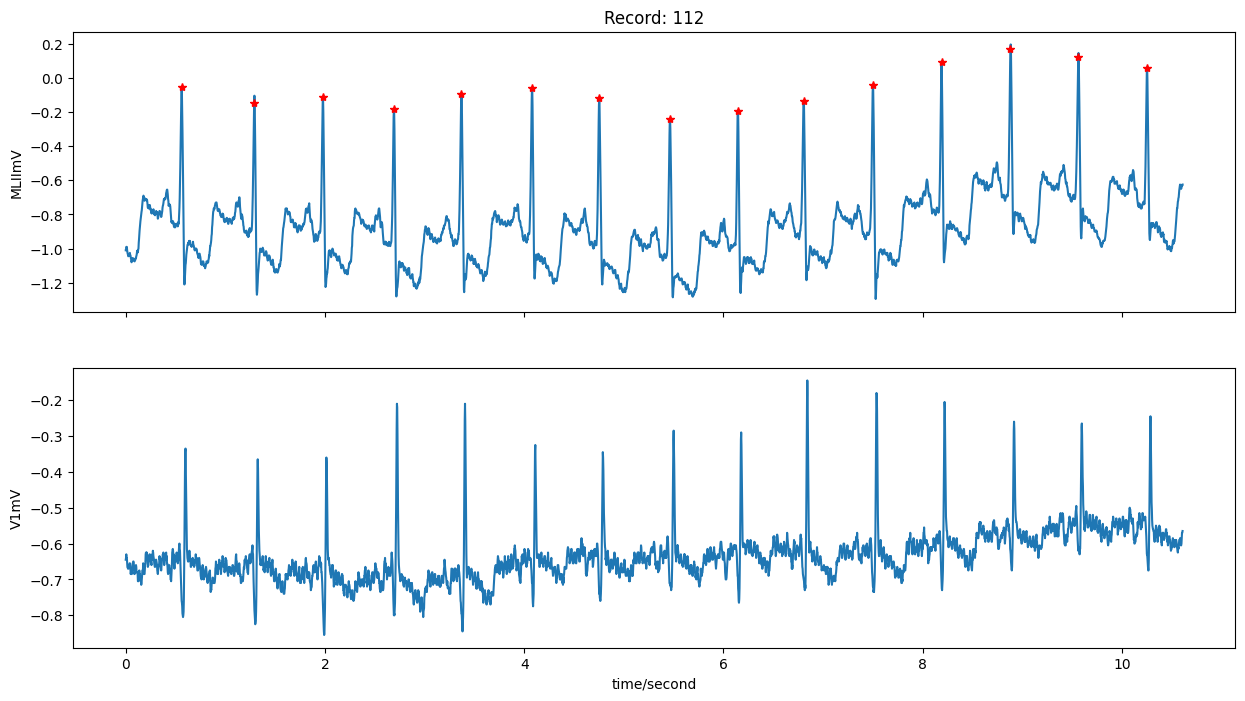

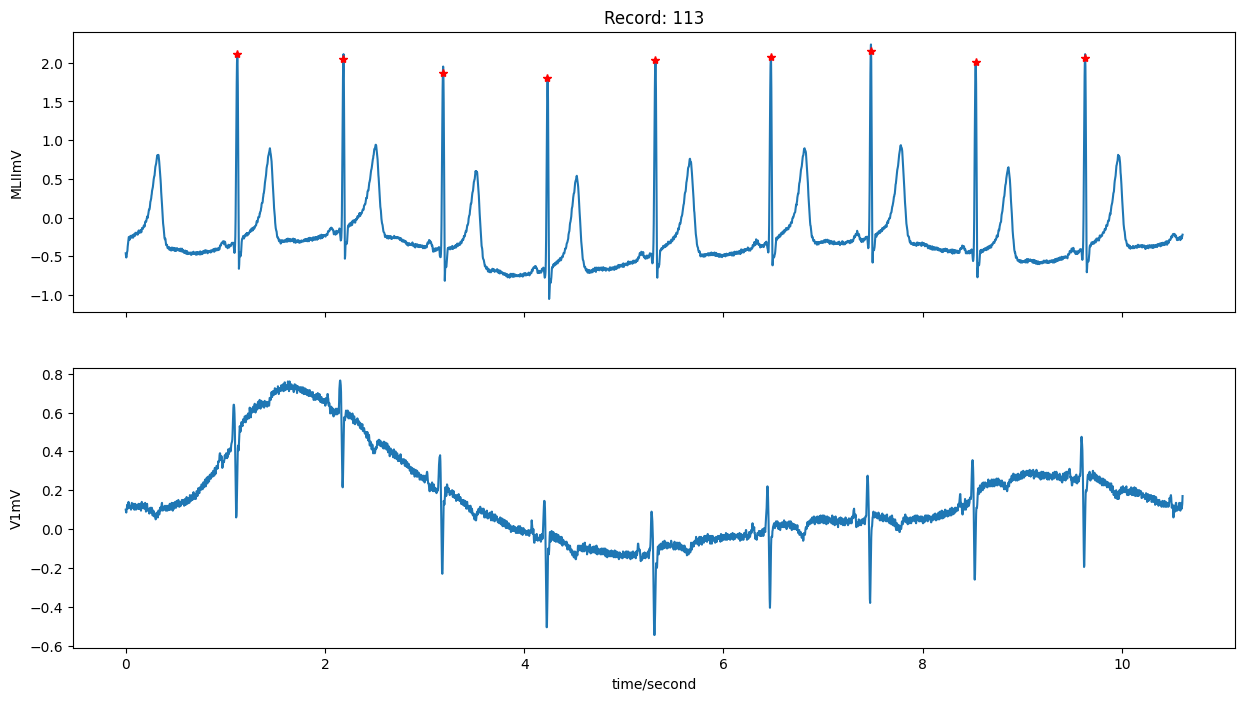

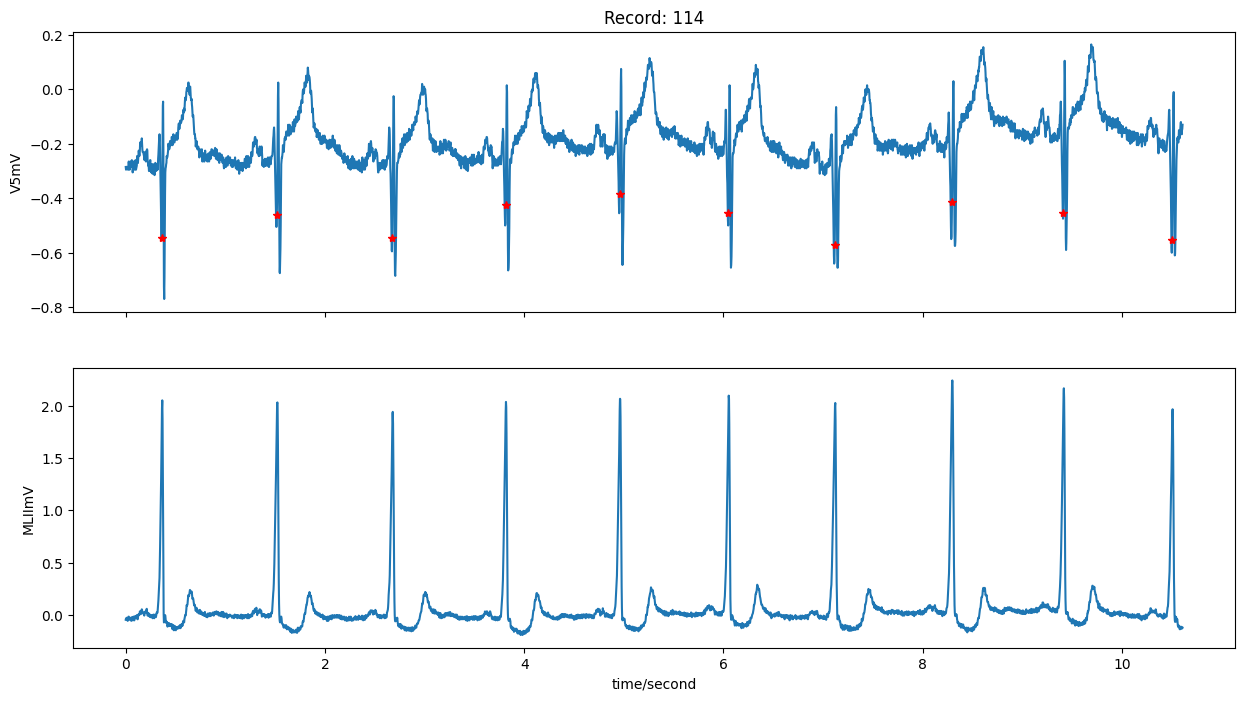

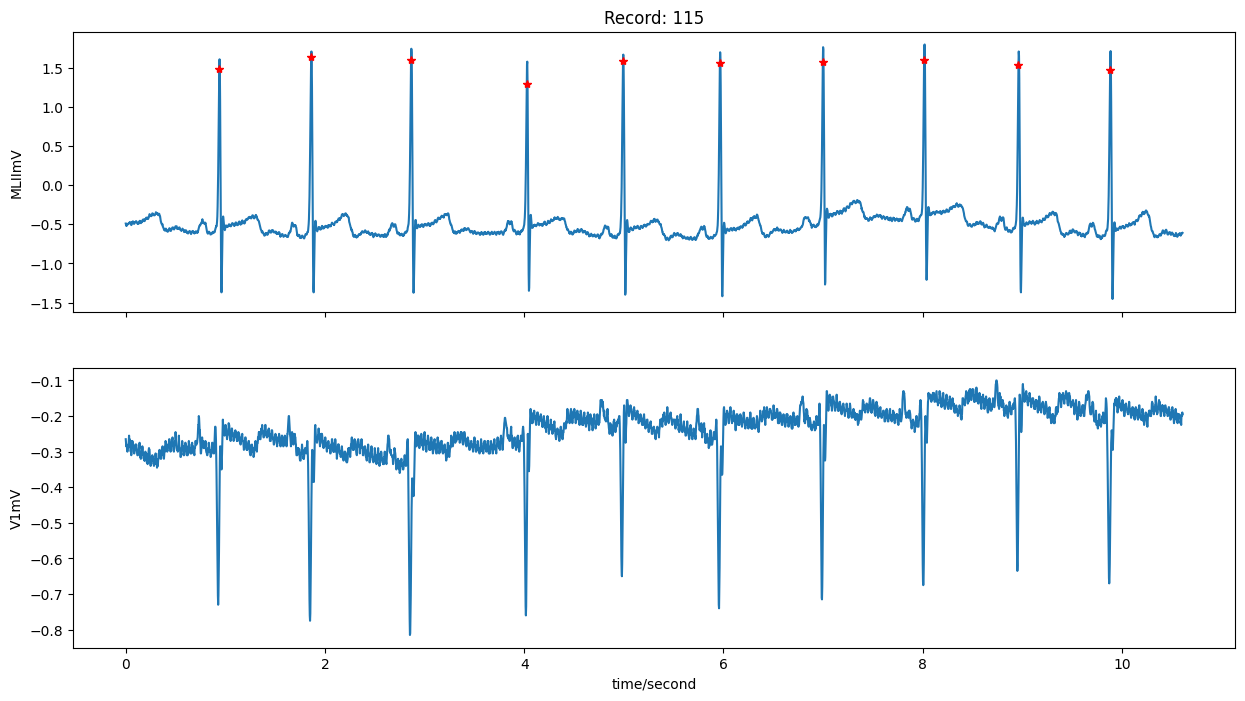

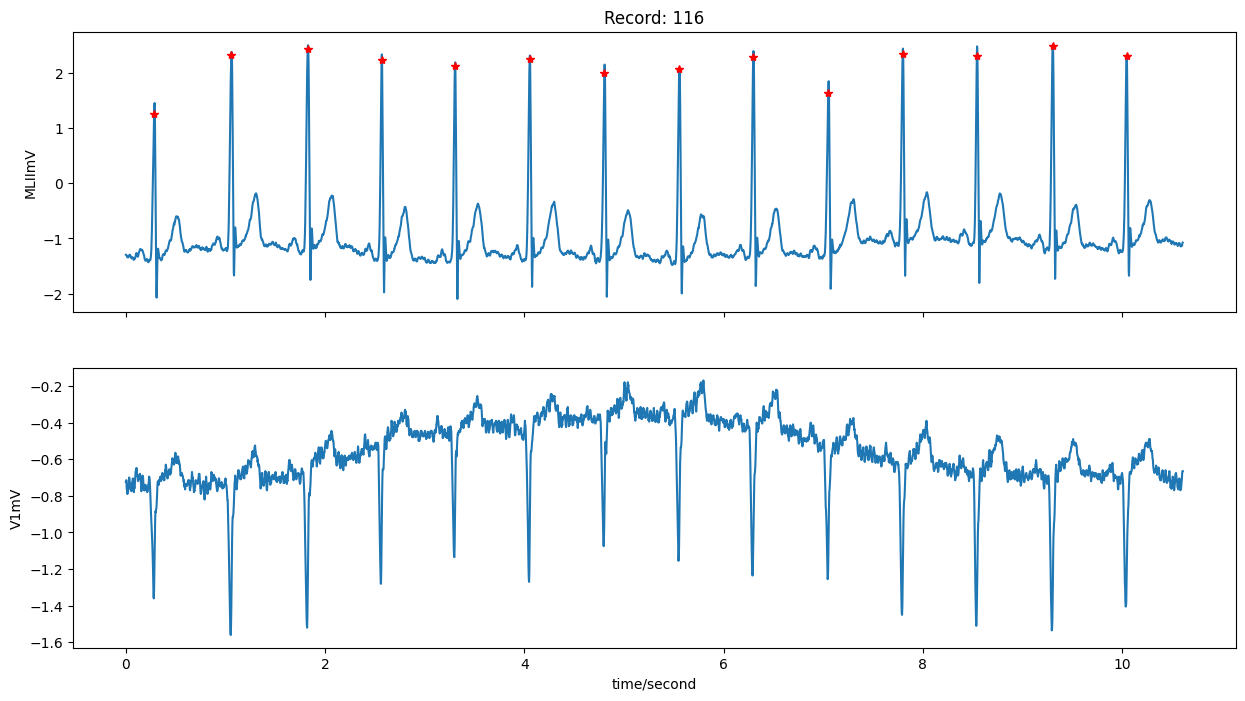

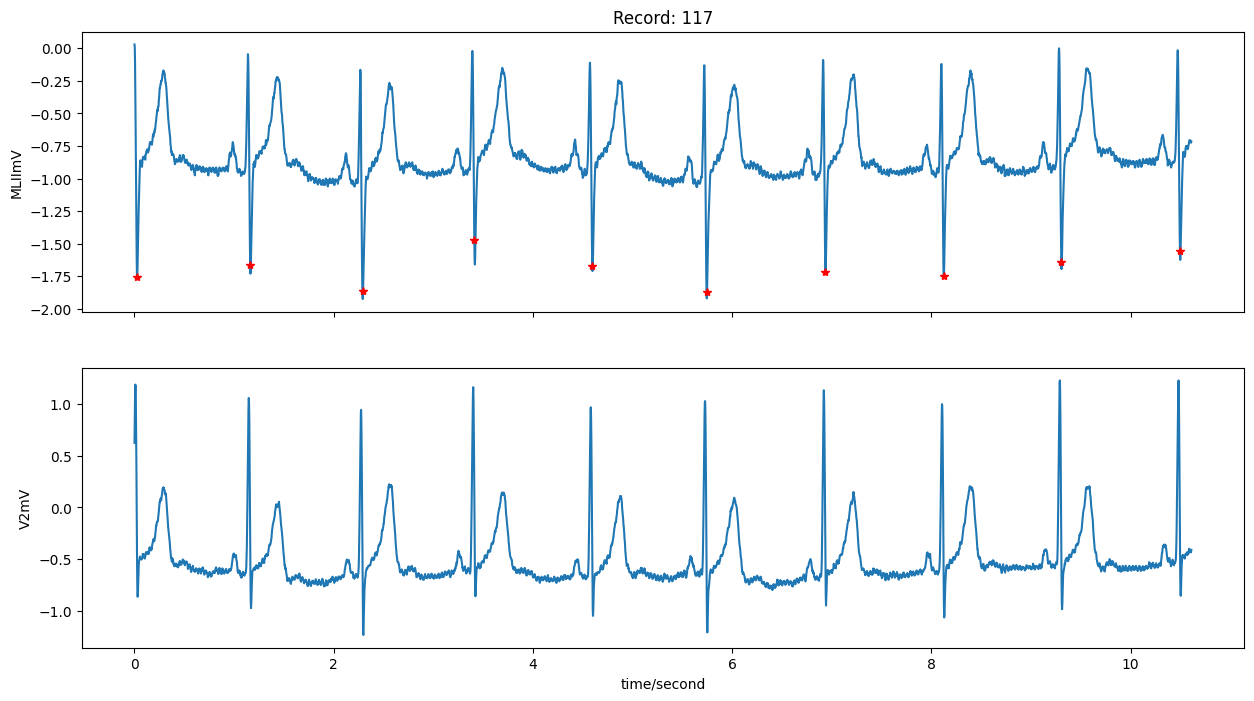

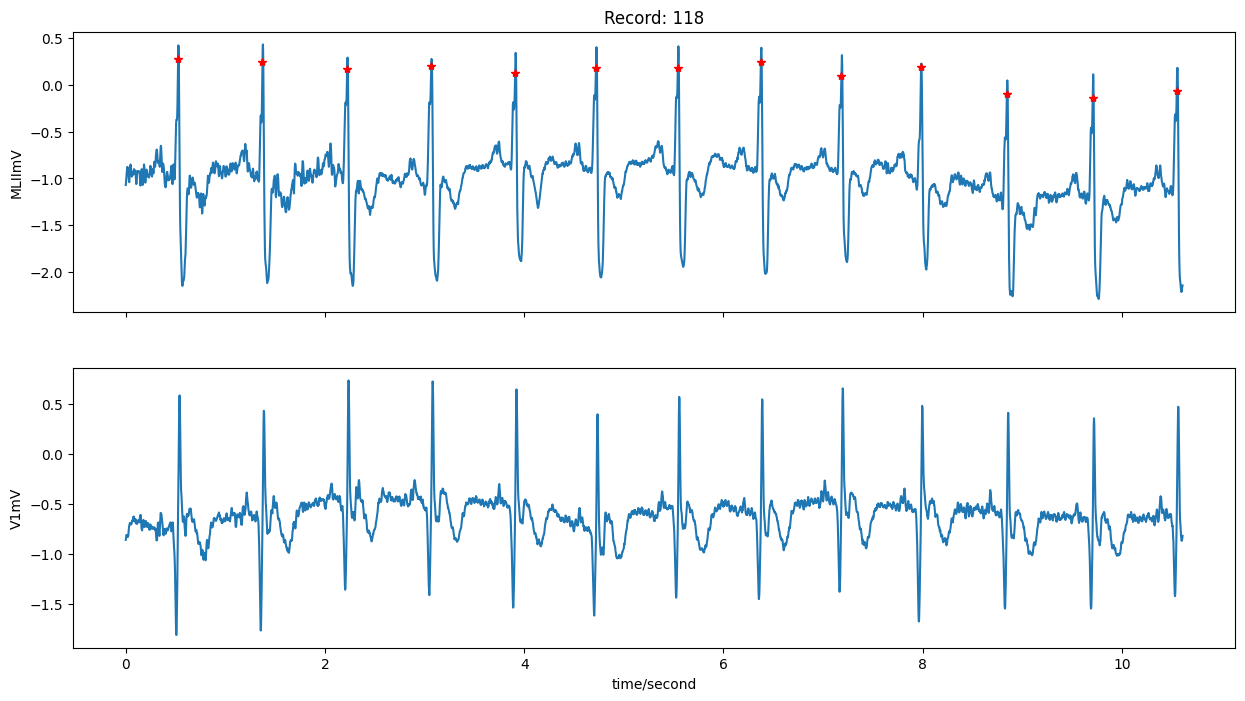

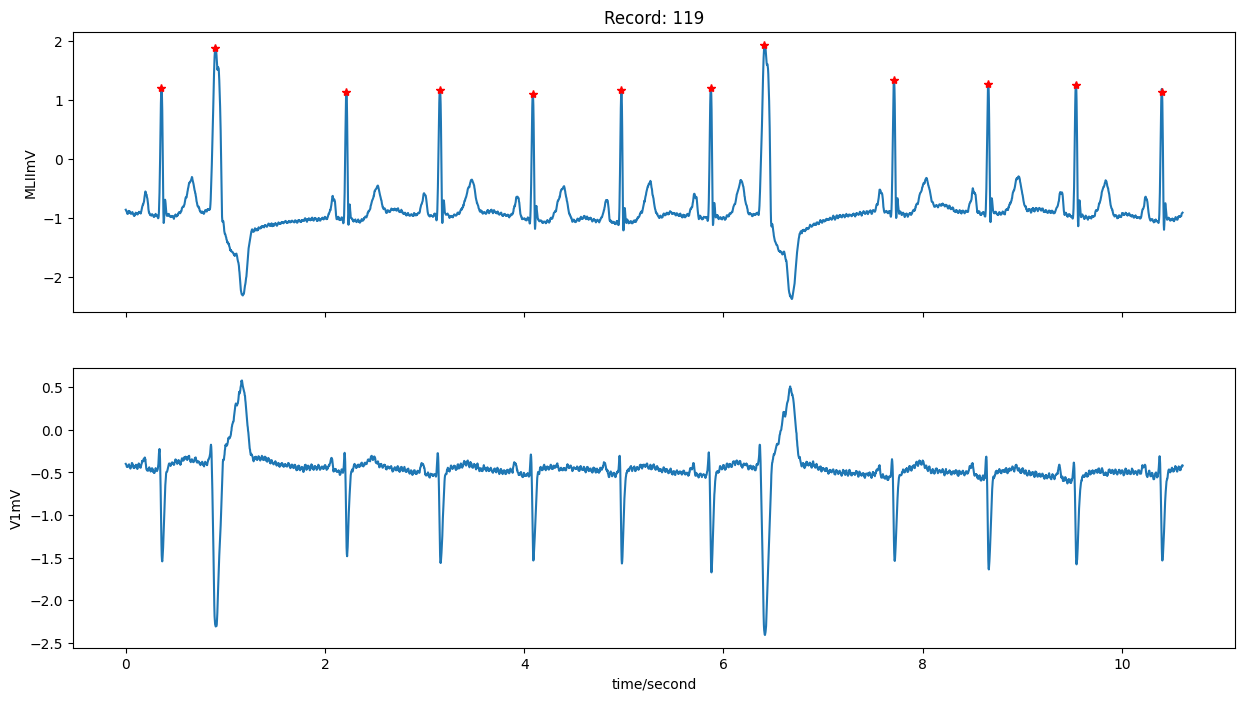

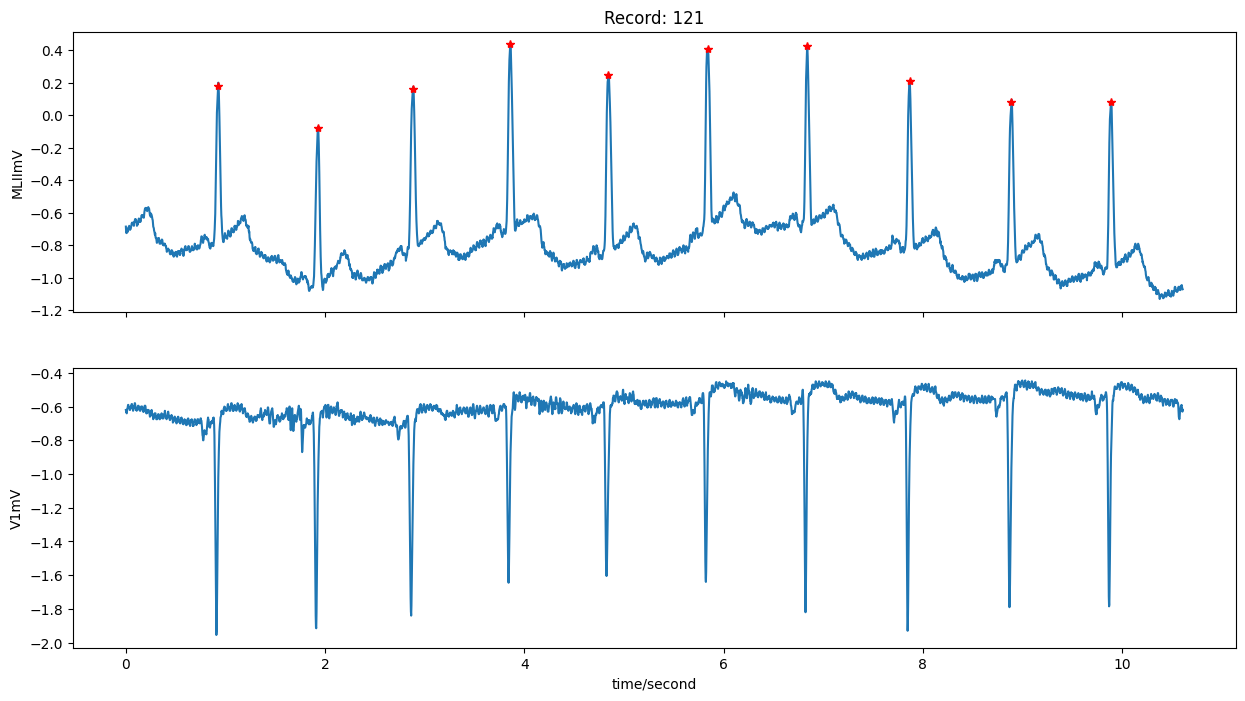

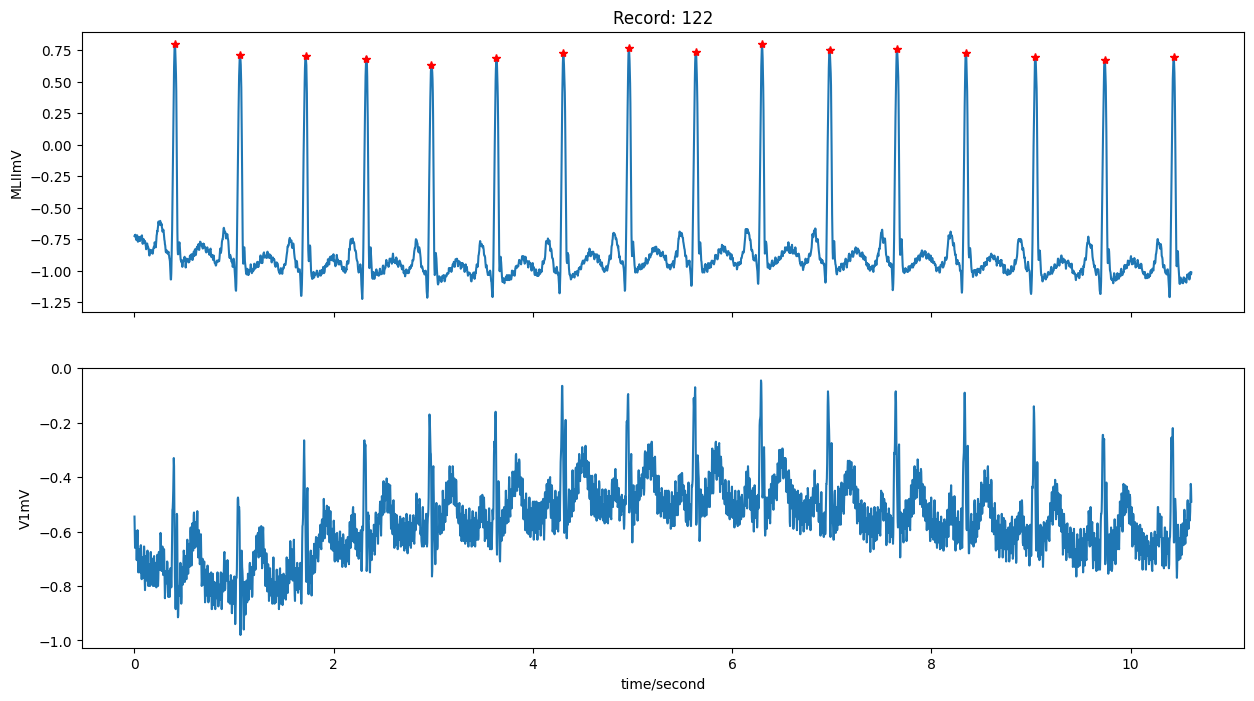

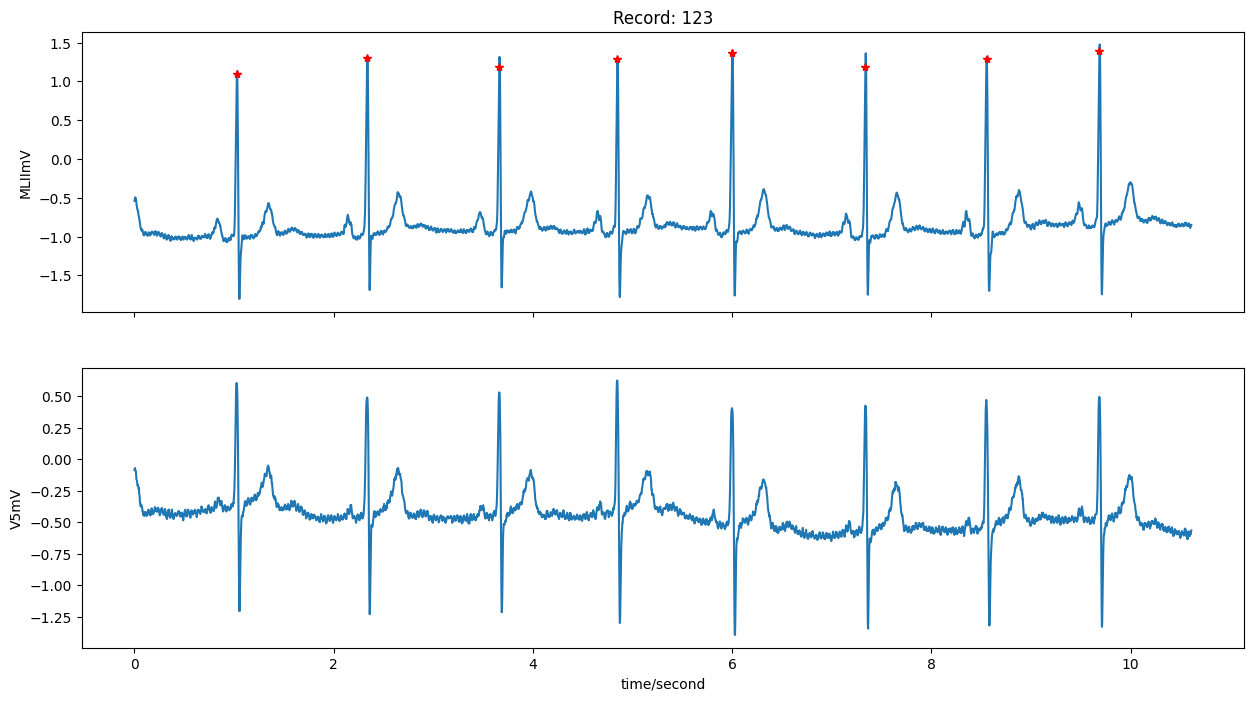

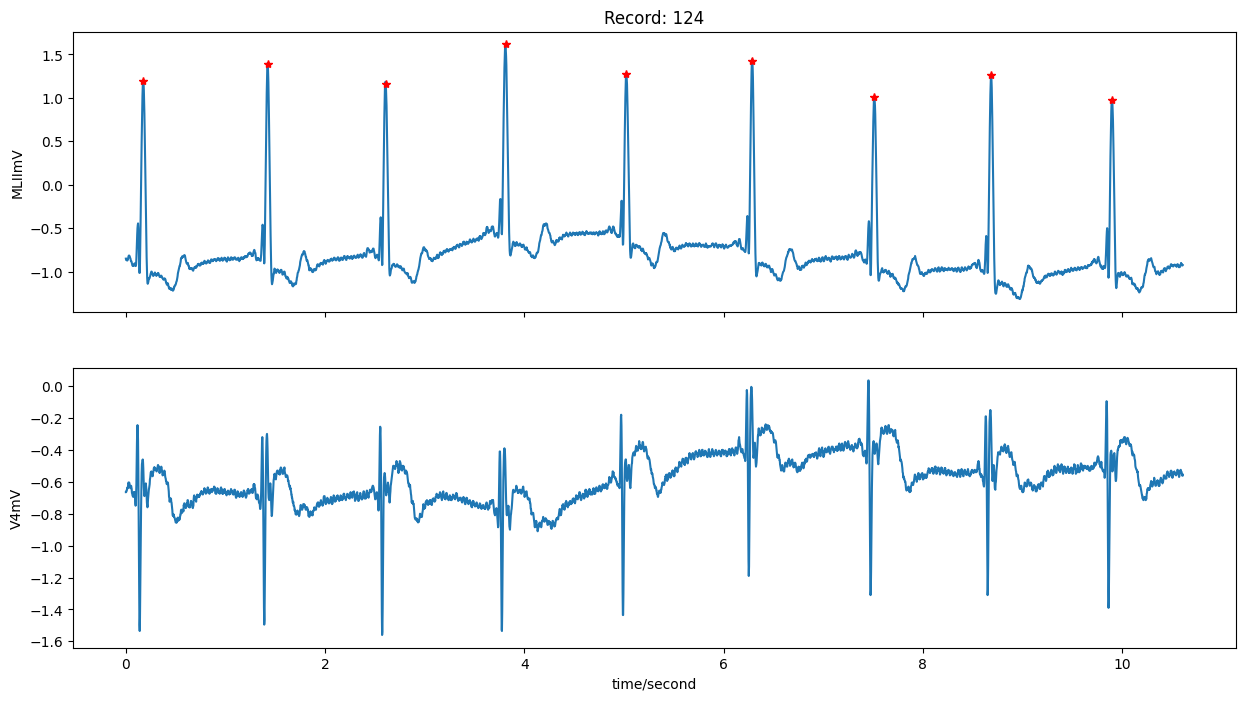

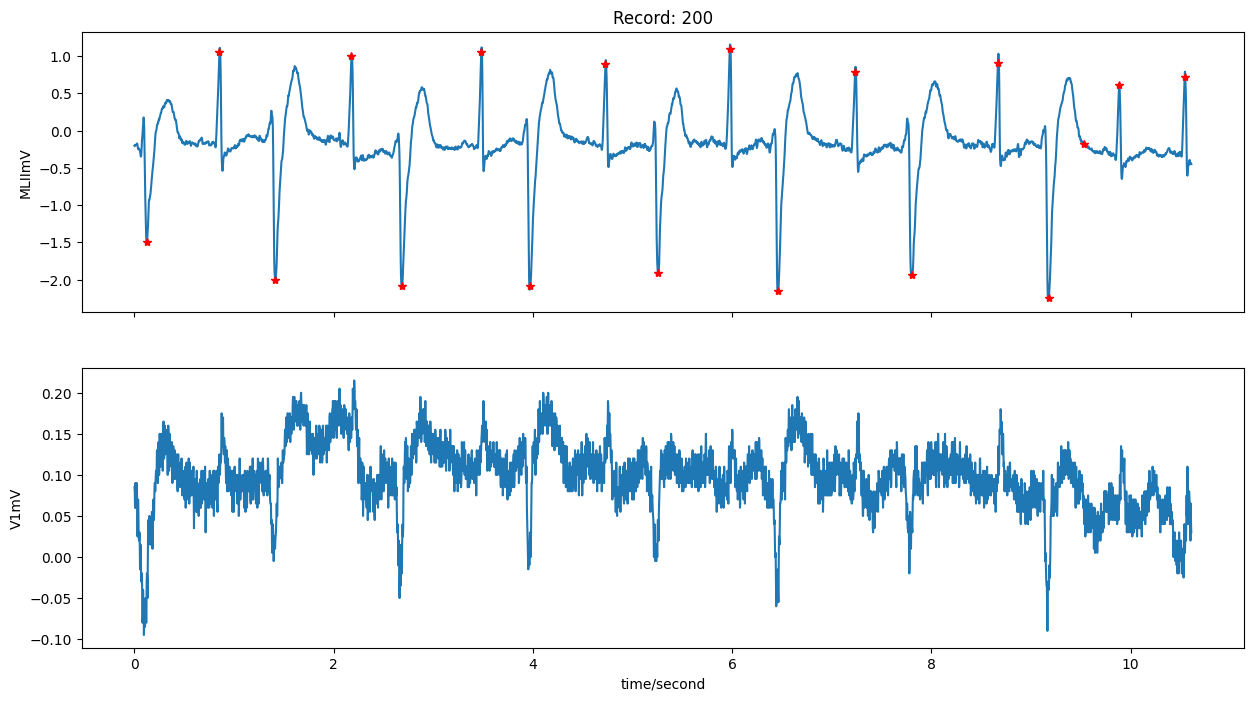

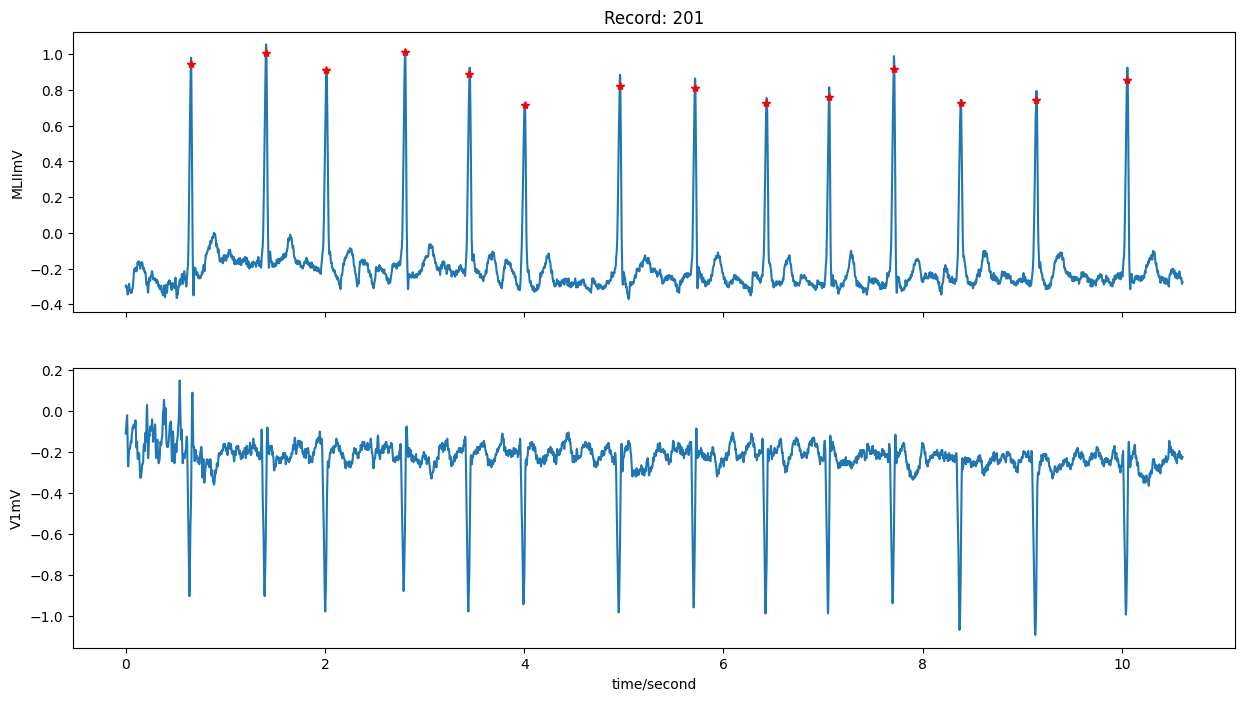

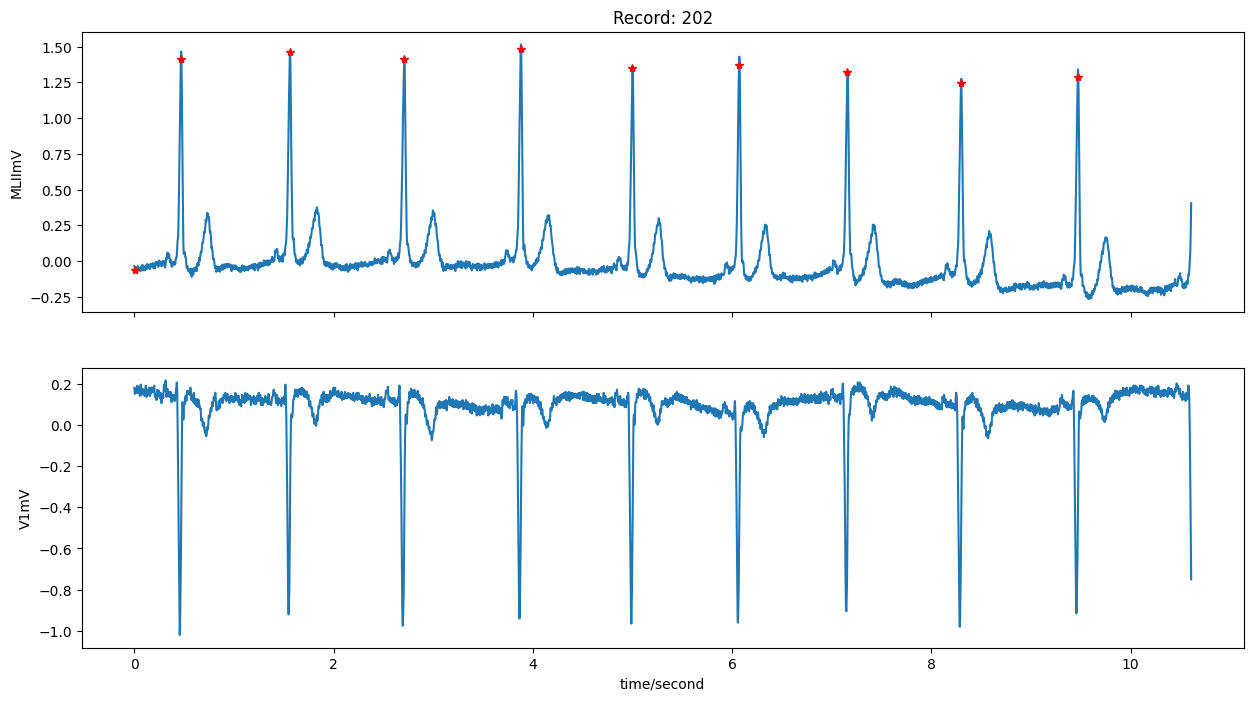

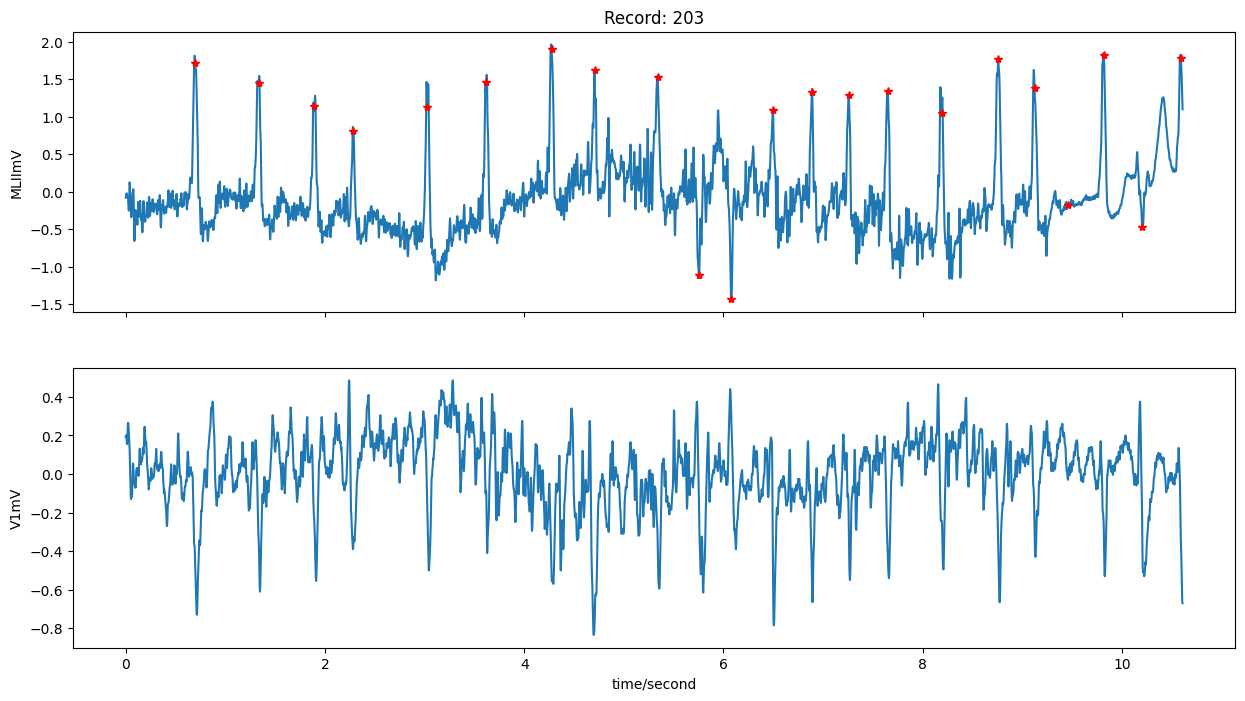

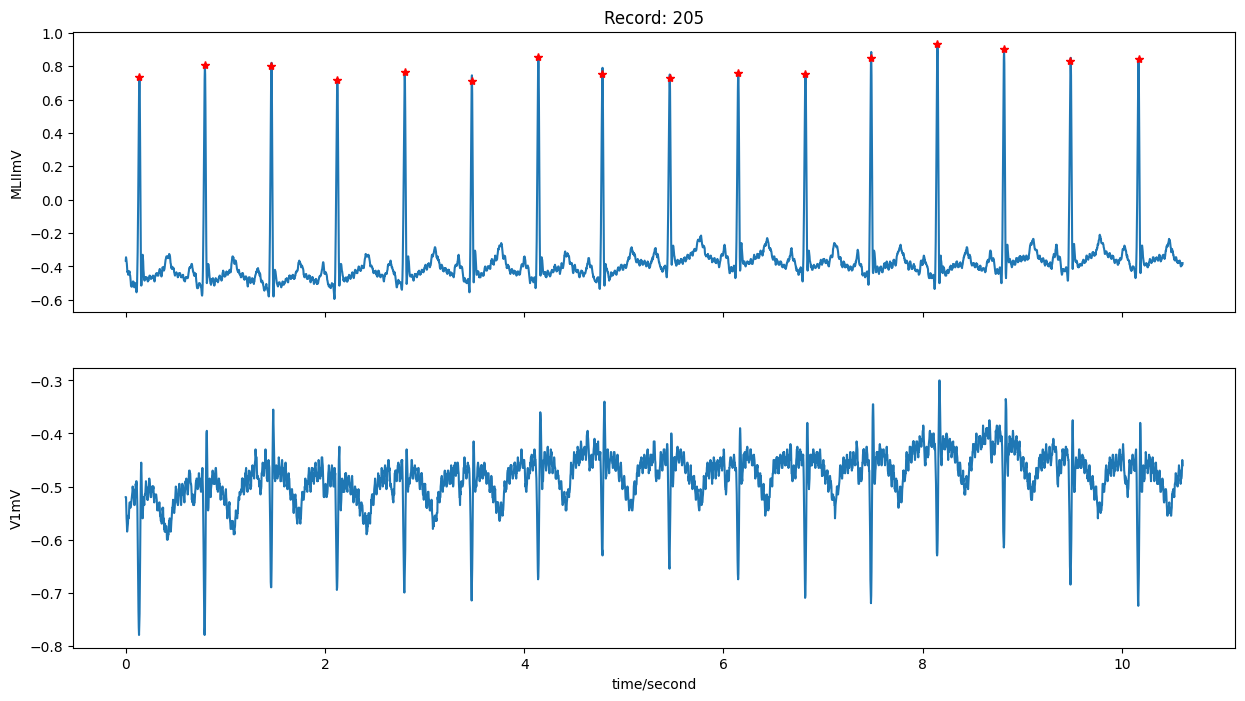

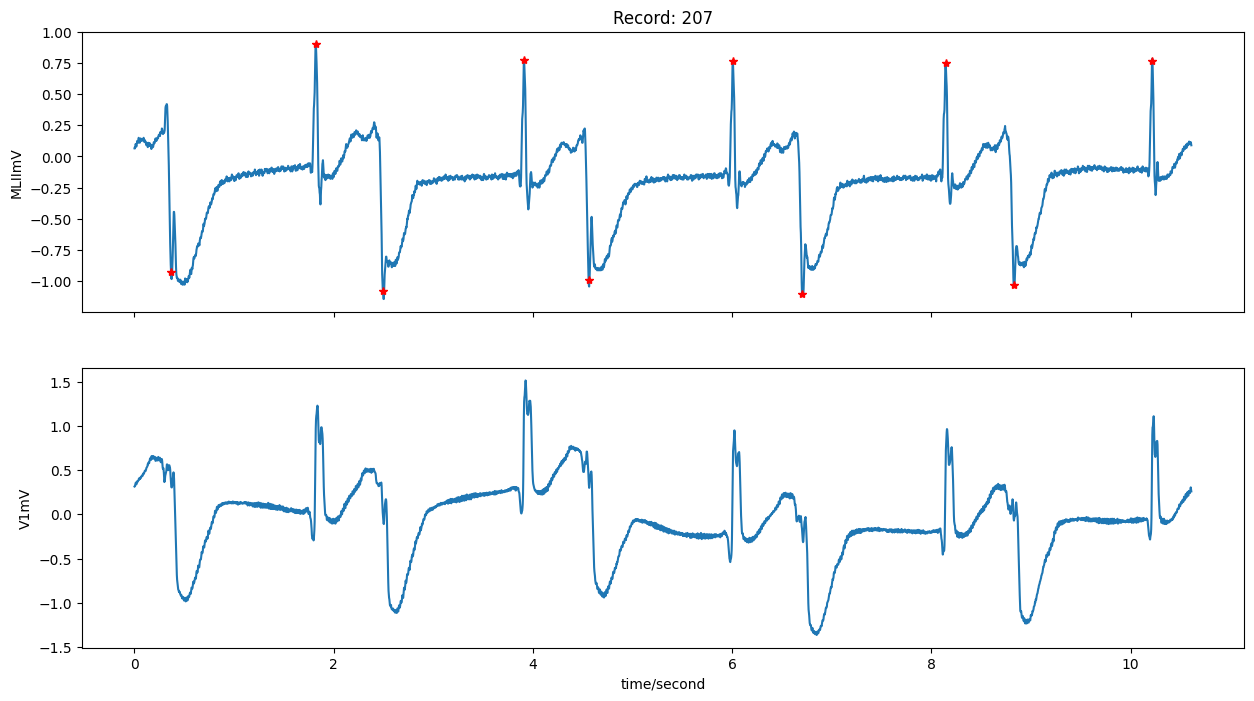

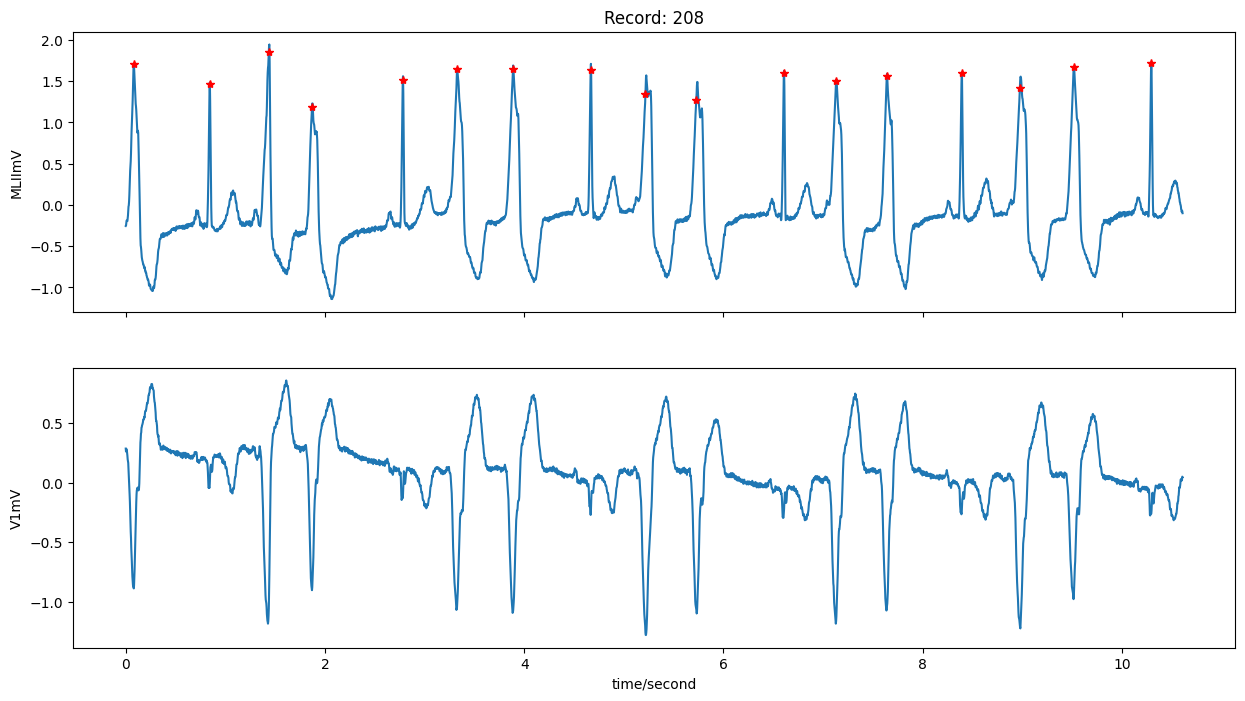

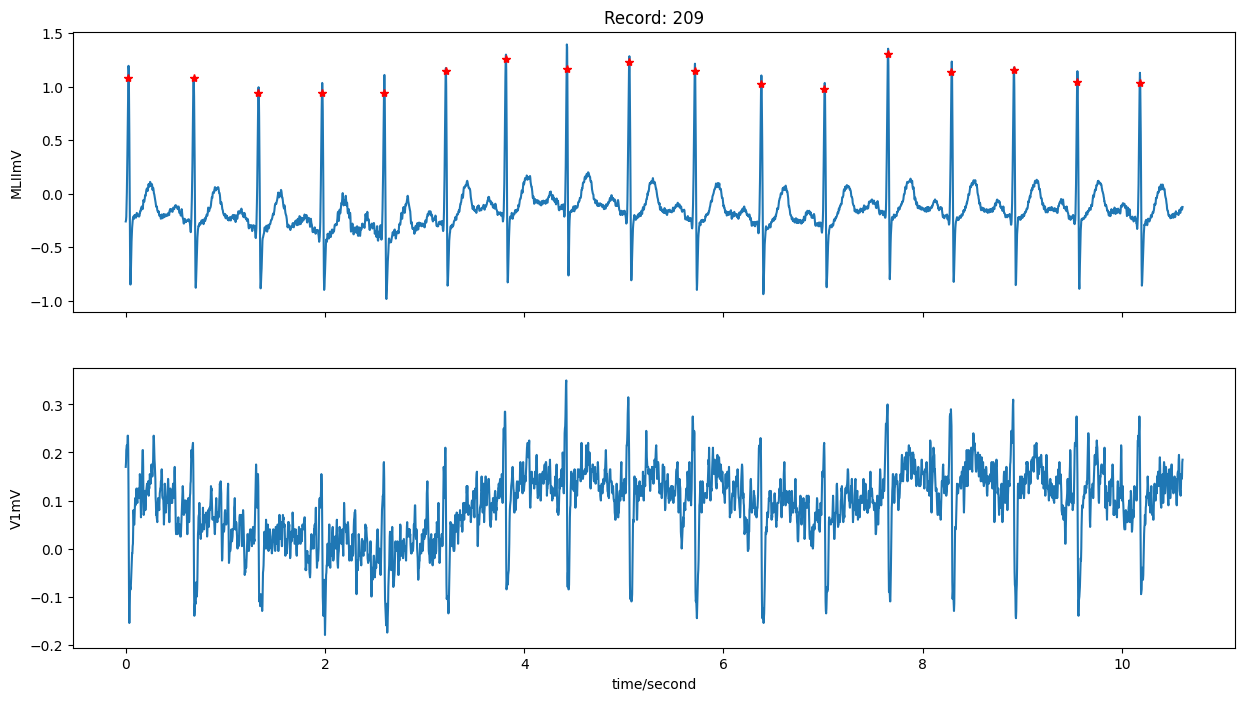

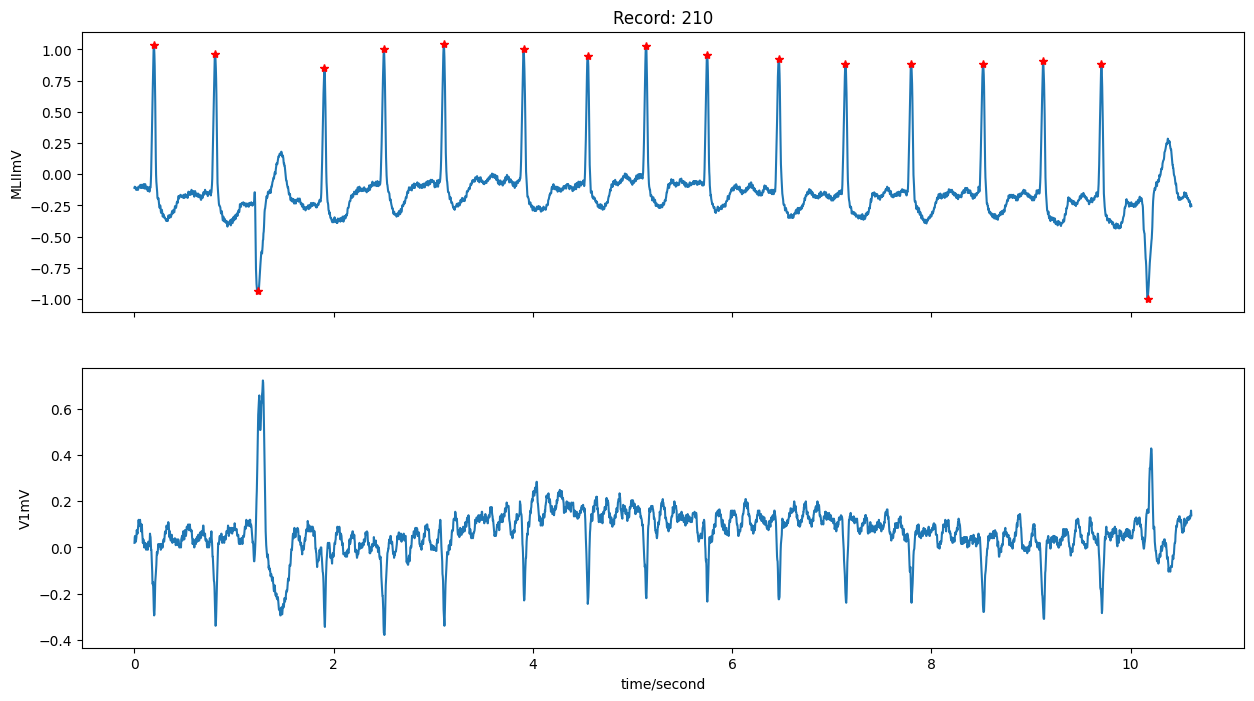

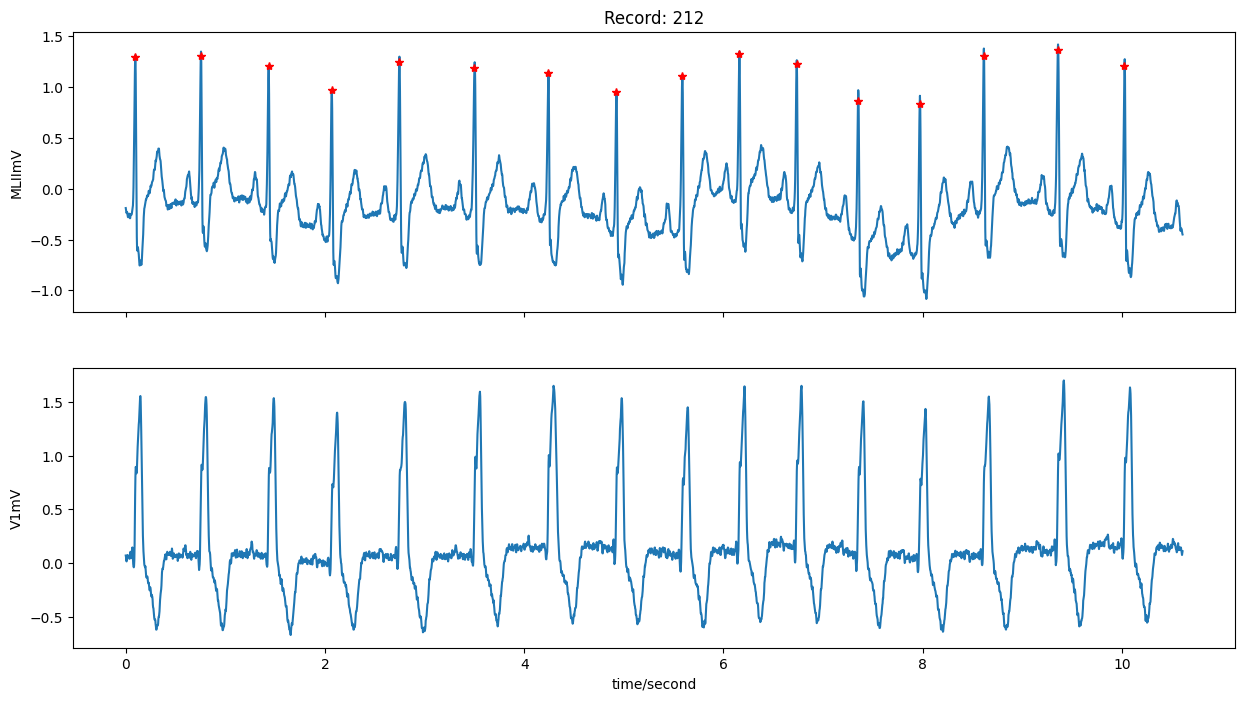

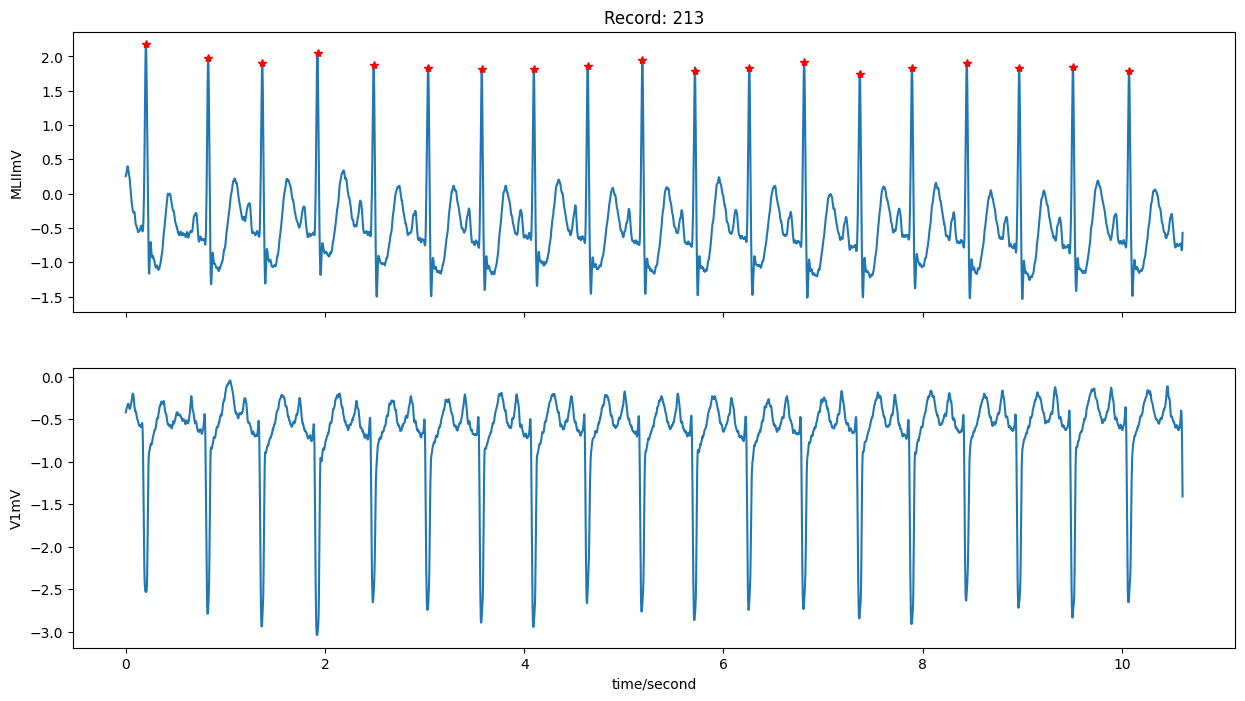

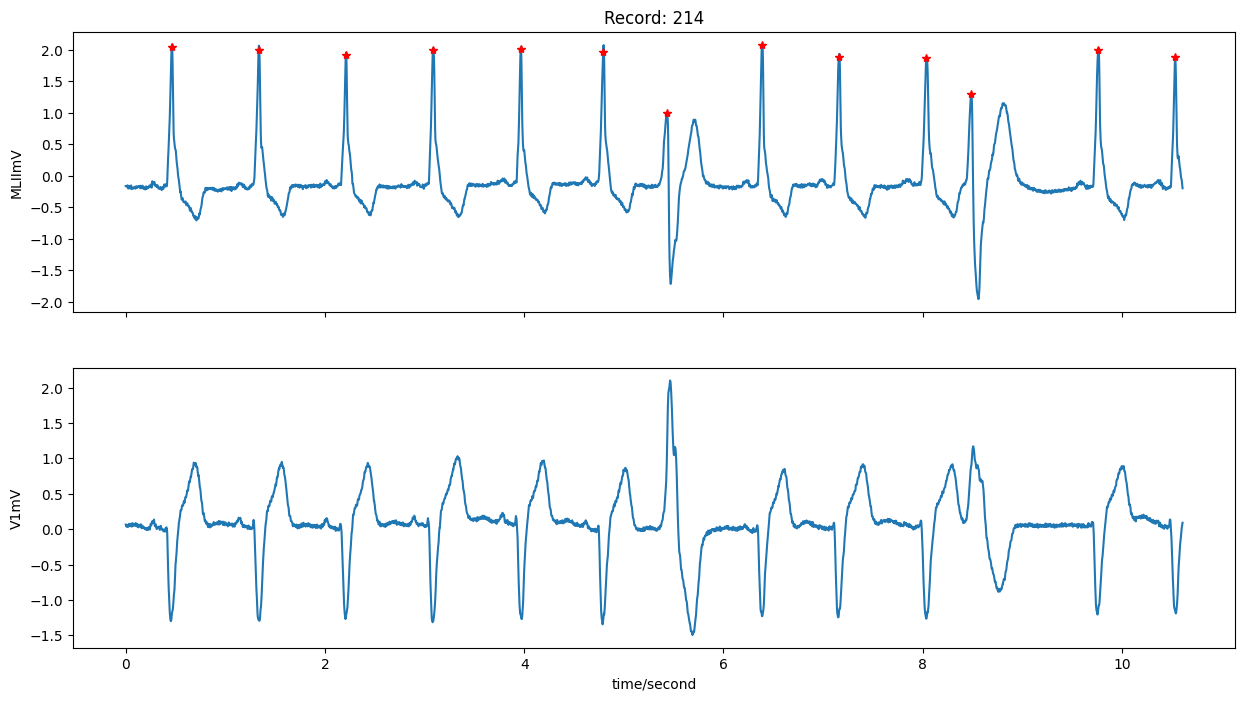

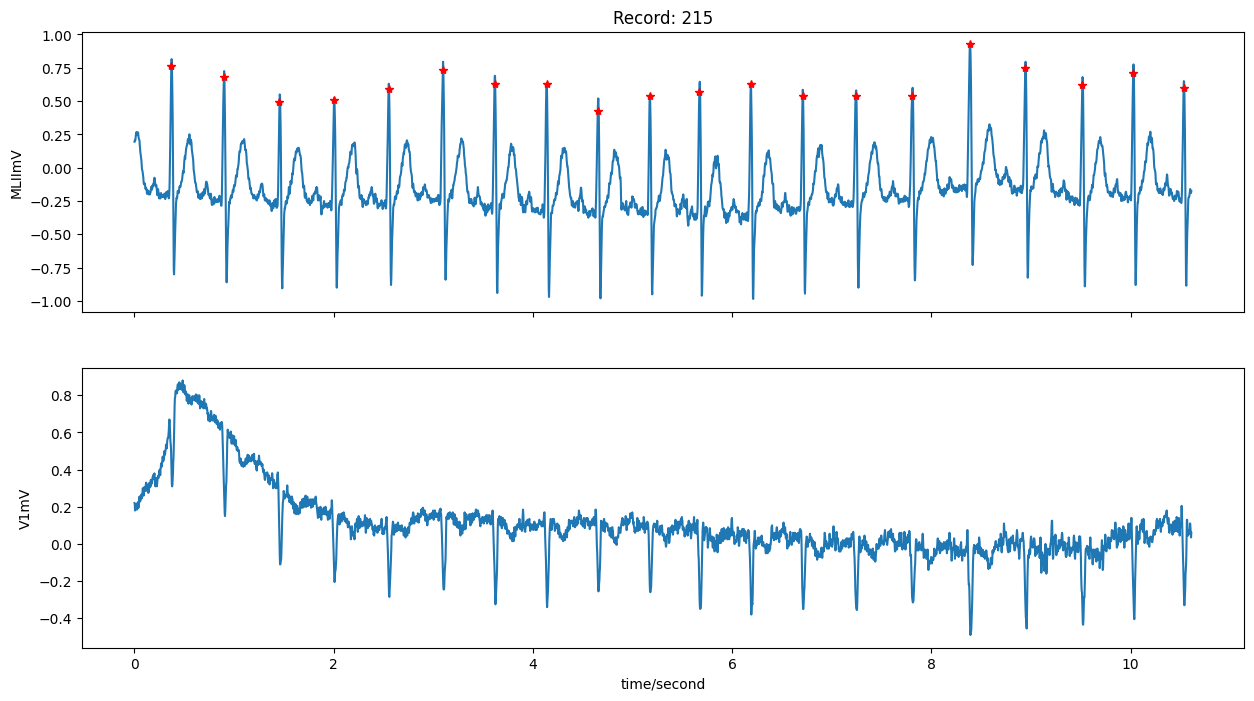

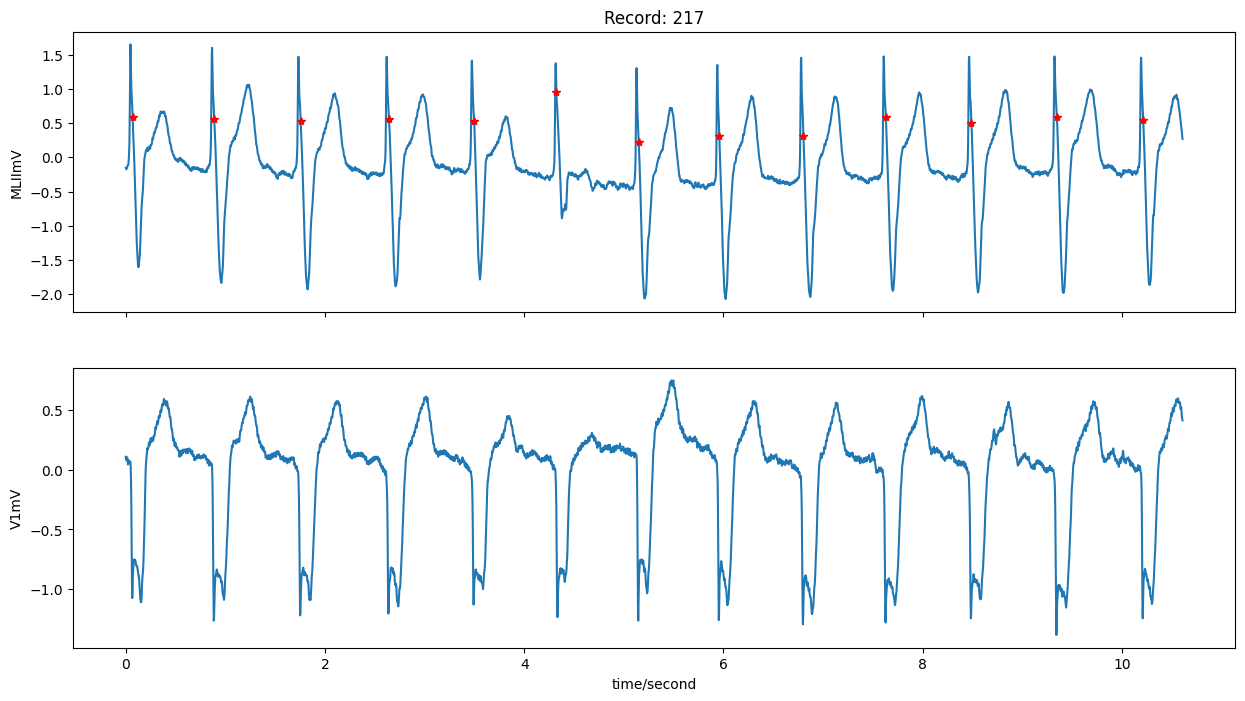

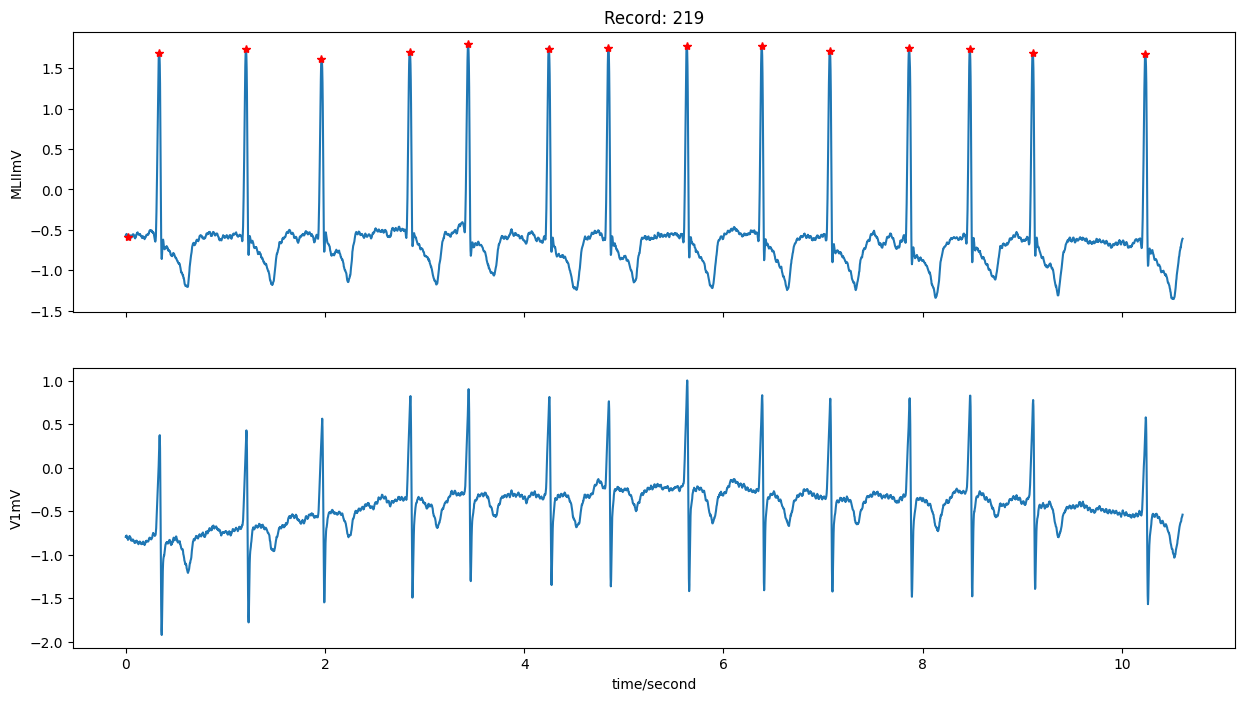

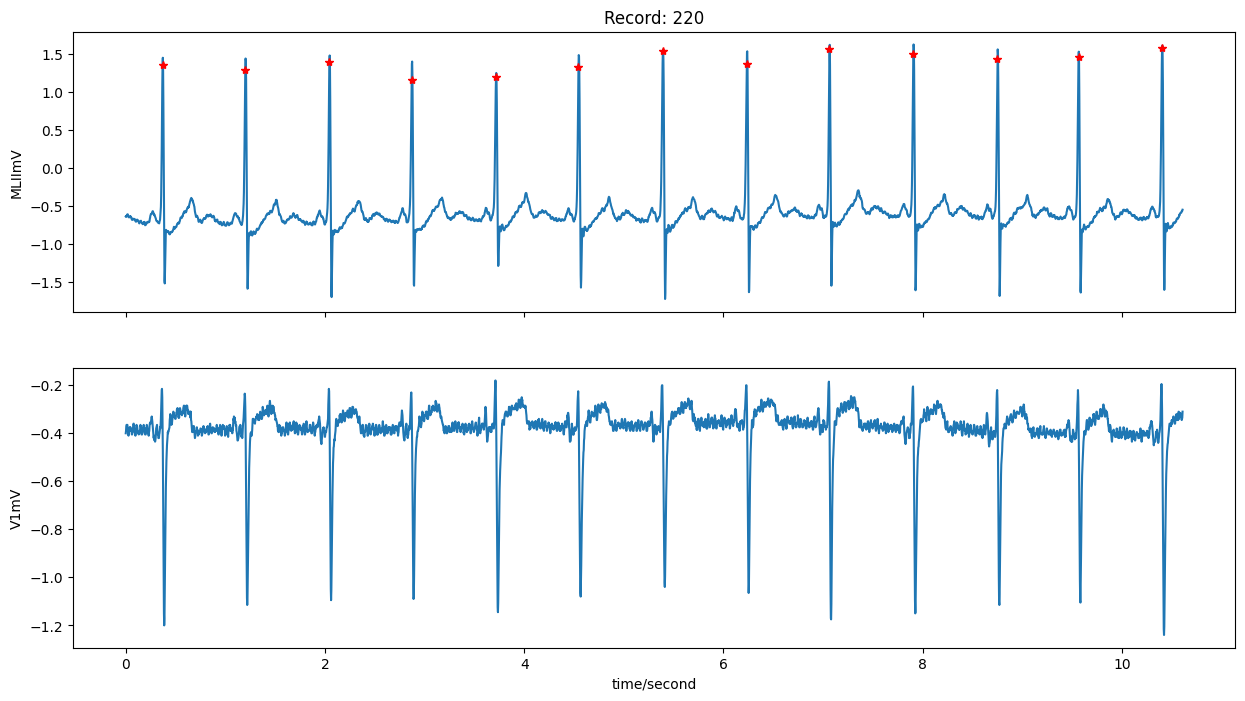

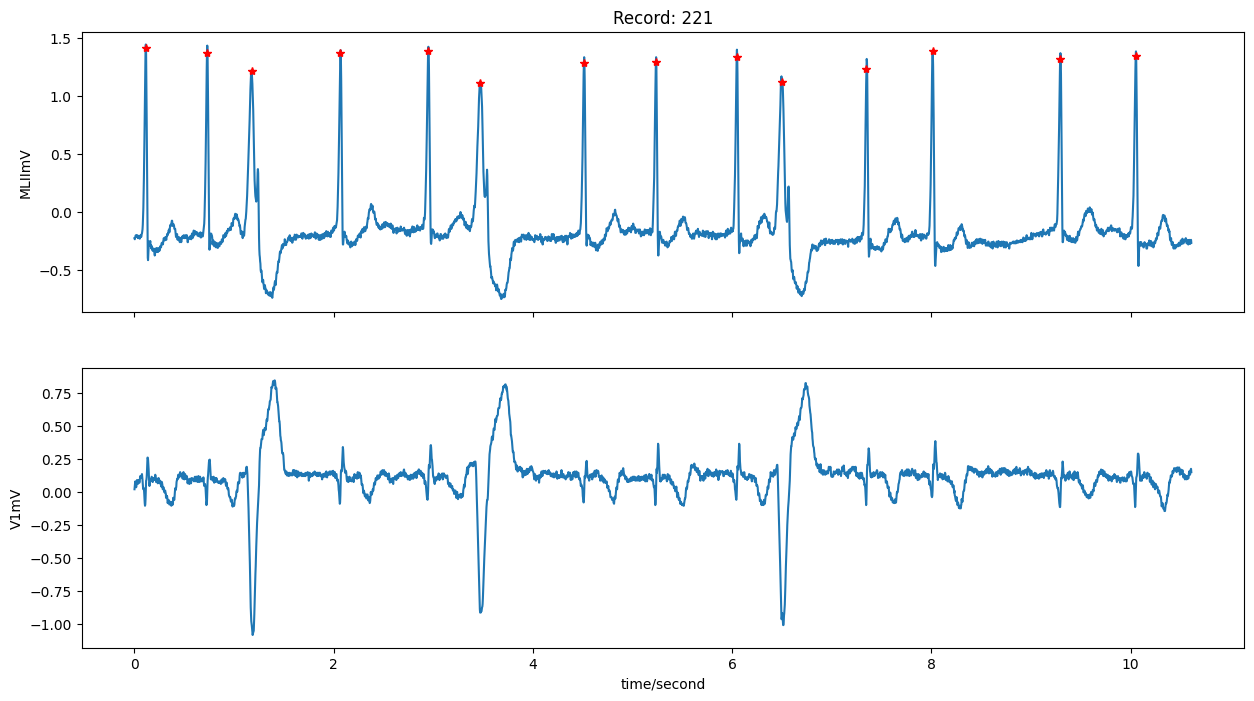

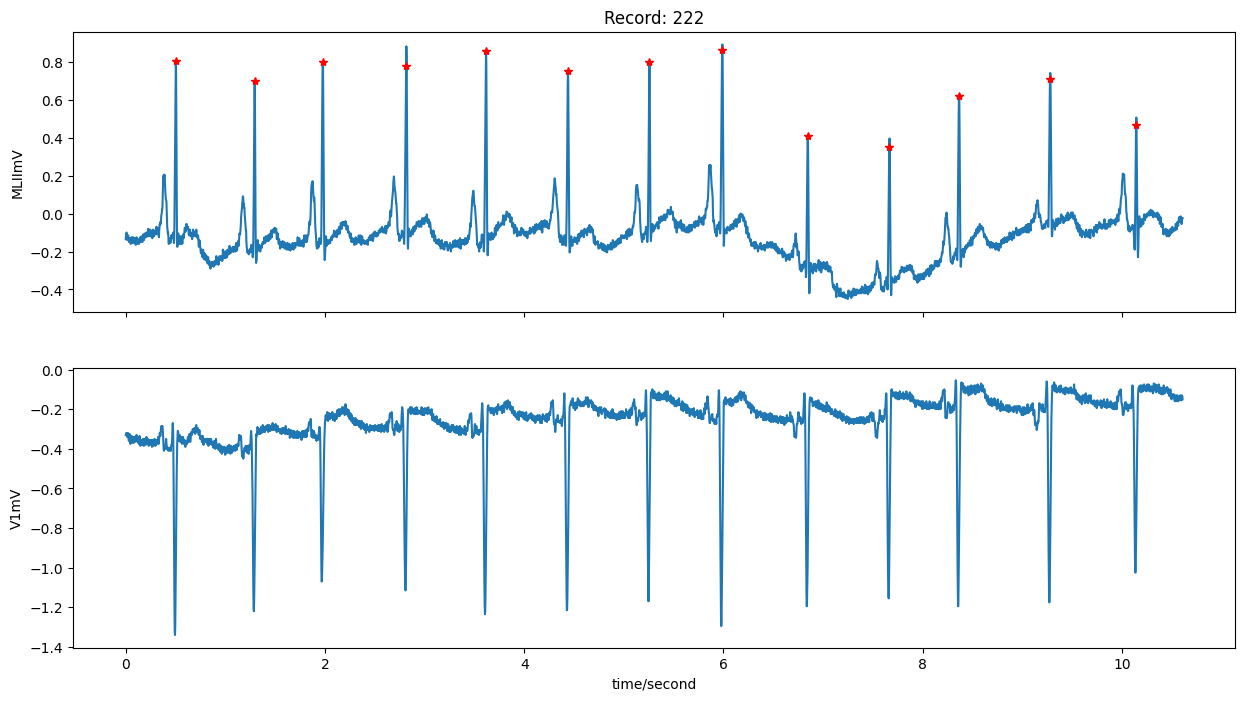

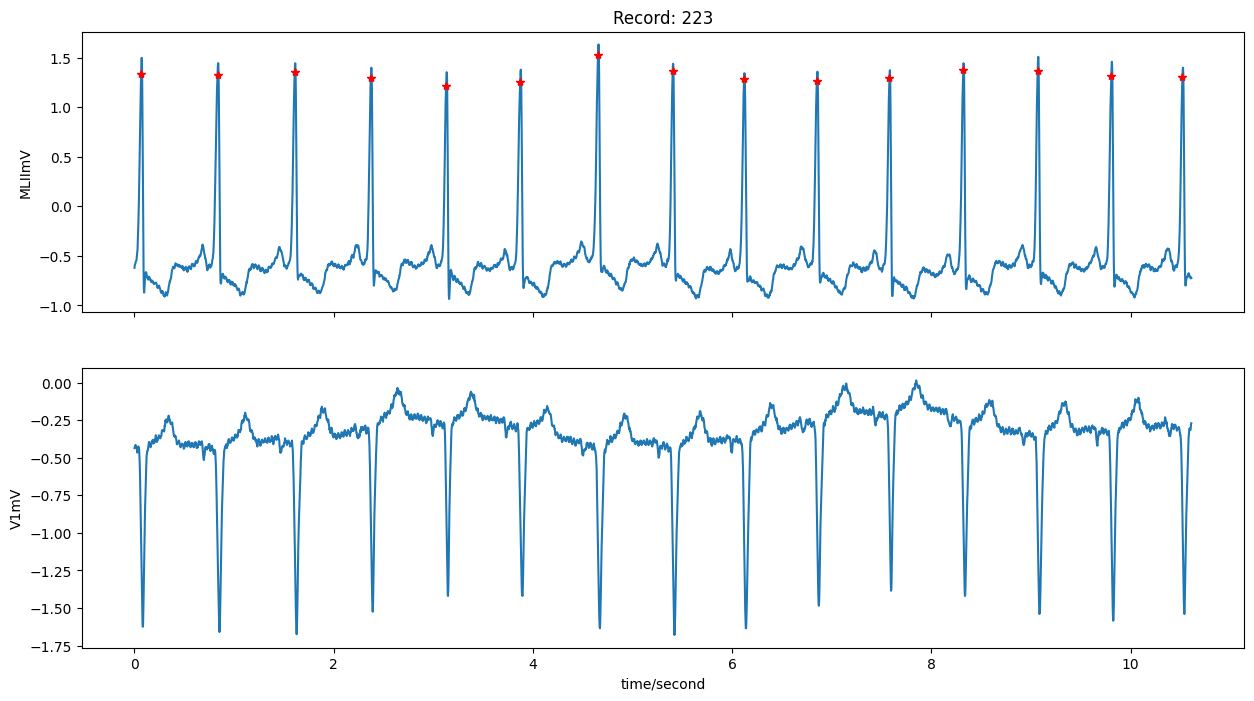

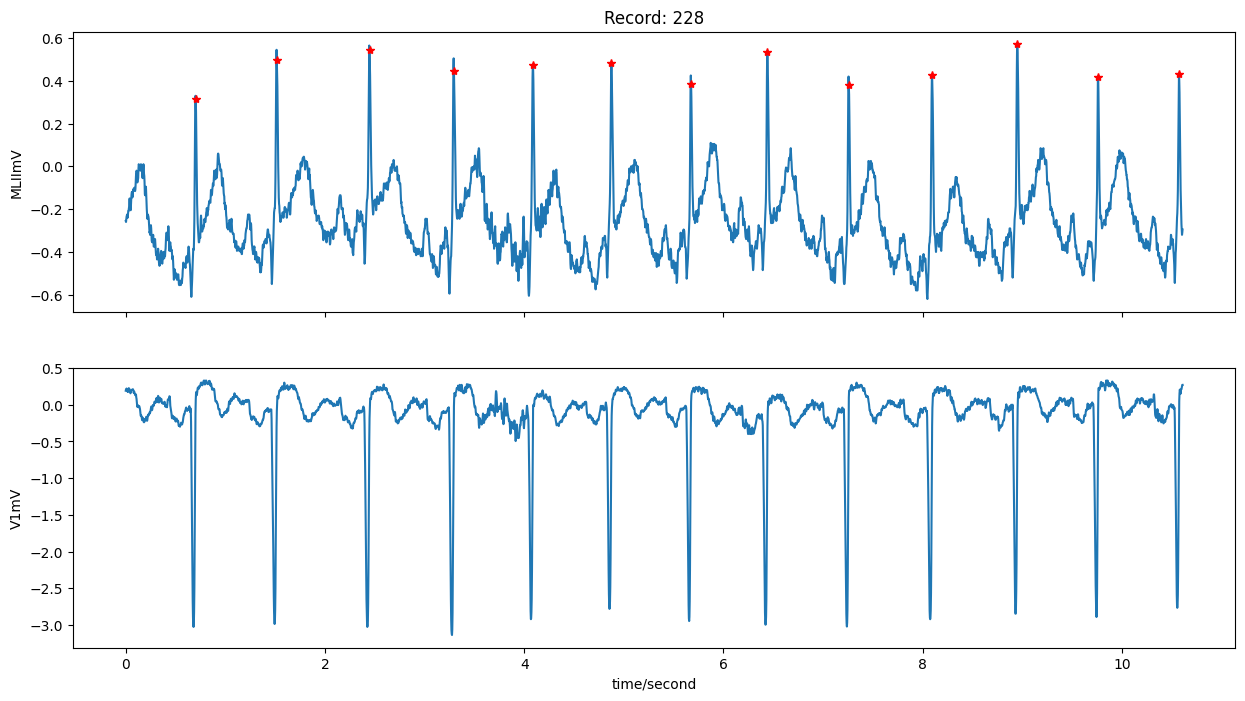

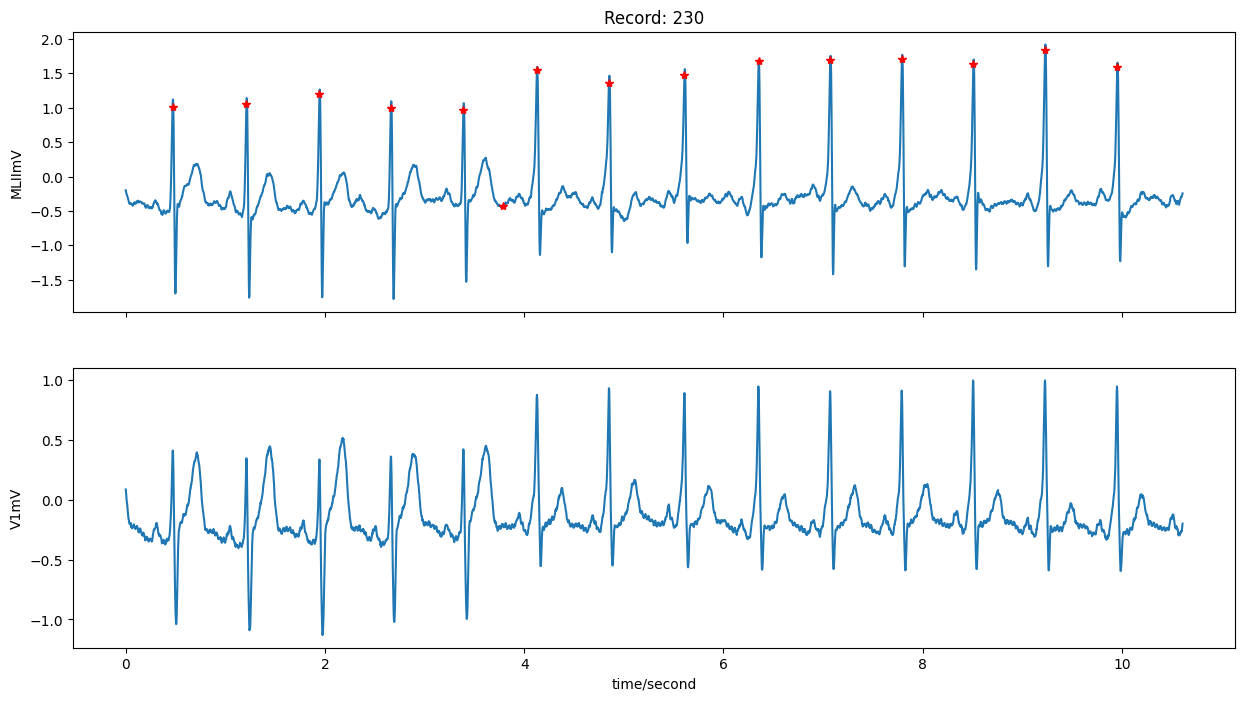

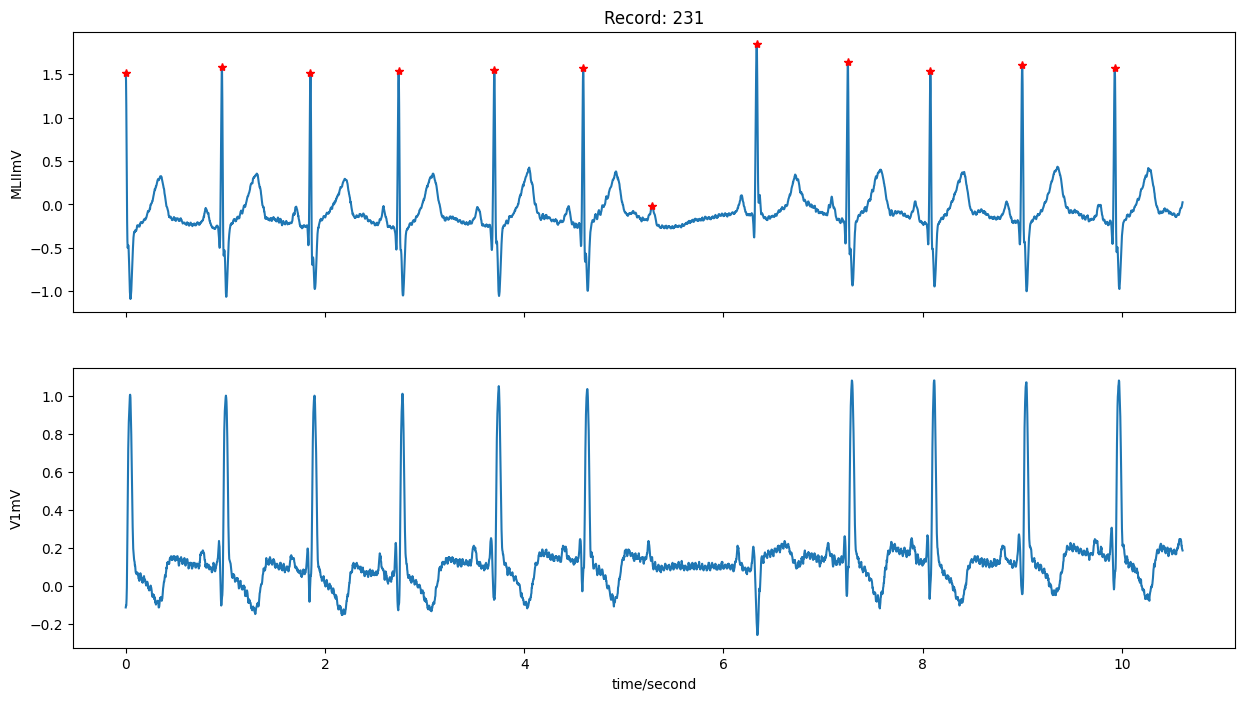

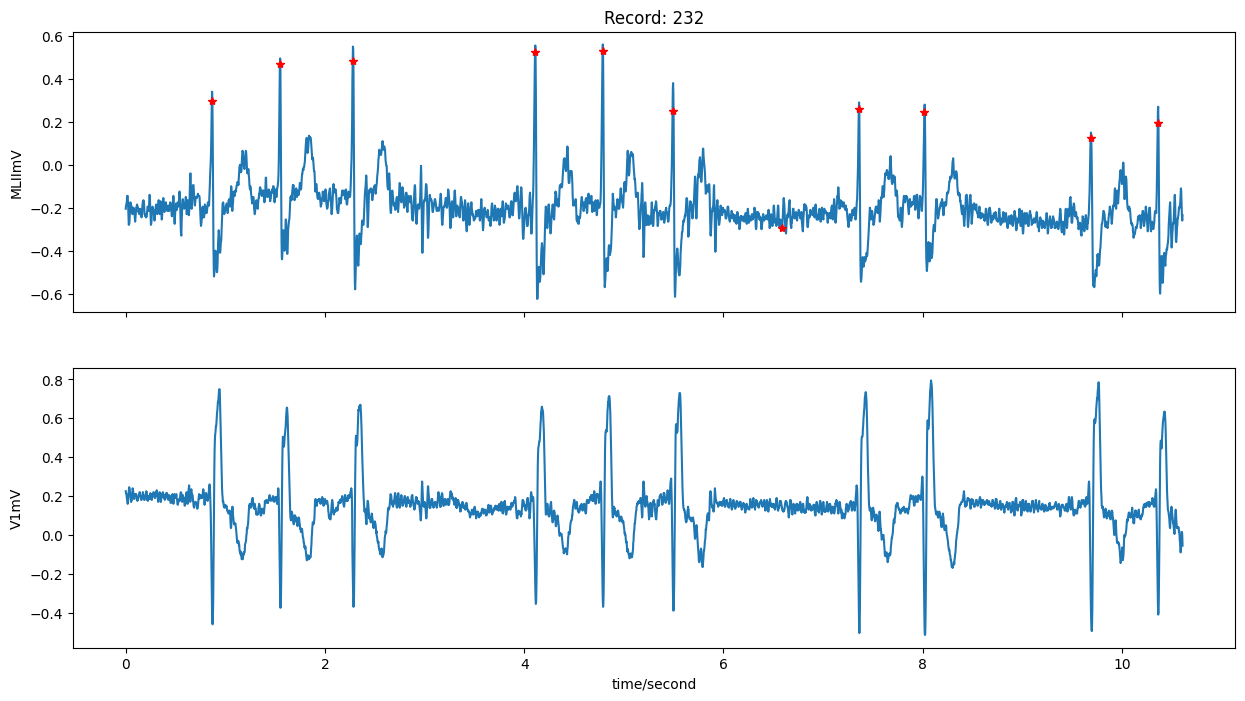

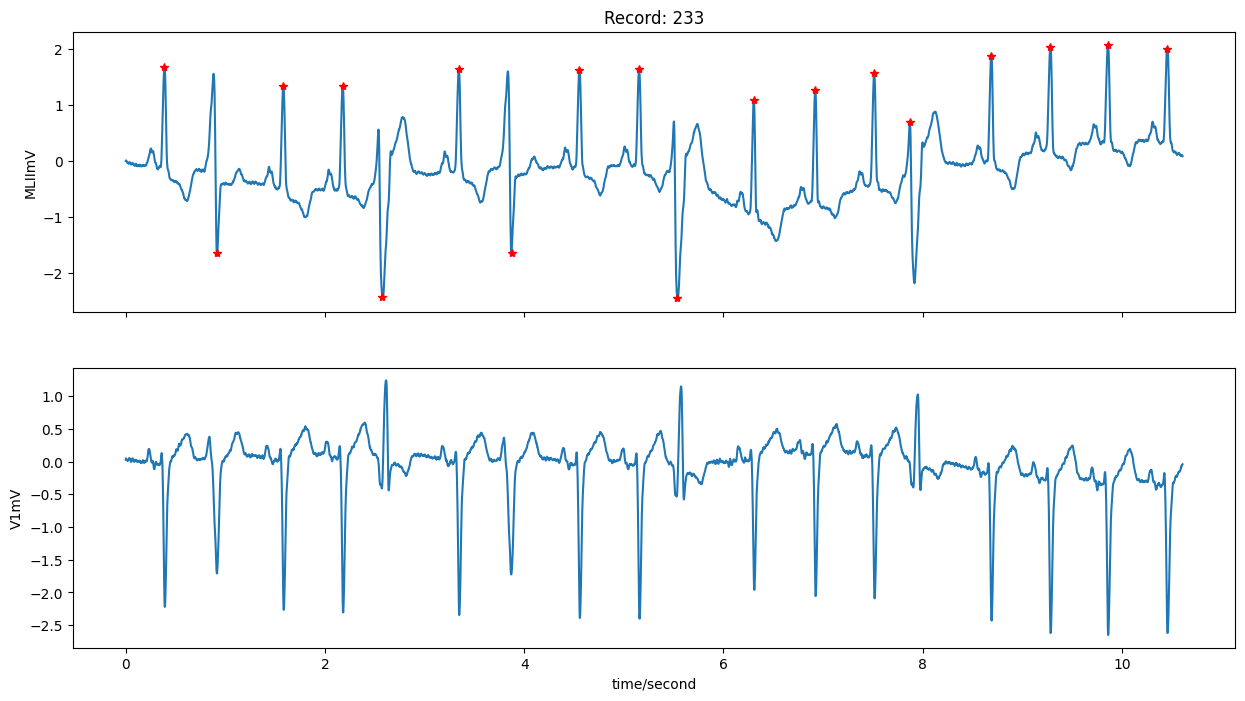

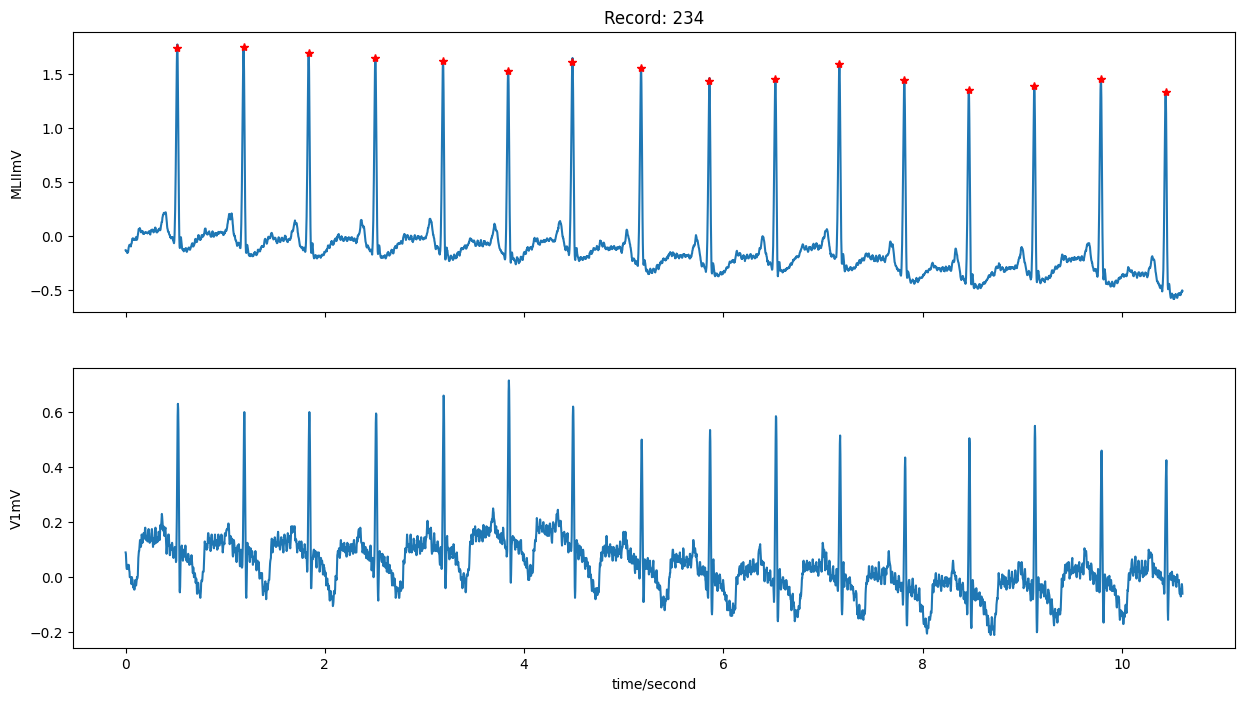

Extracted signals shape: (48, 3820)


In [14]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import os

dataset_dir = 'mit-bih-arrhythmia-database-1.0.0/'

record_numbers = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 200, 201, 202, 203, 205, 207, 208, 209, 210, 212, 213, 214, 215, 217, 219, 220, 221, 222, 223, 228, 230, 231, 232, 233, 234]

sampfrom = 180
sampto = 4000

signals = []
annotations = []

for record_number in record_numbers:
    filename = os.path.join(dataset_dir, str(record_number))
    
    try:
       
        record = wfdb.rdrecord(filename, sampfrom=sampfrom, sampto=sampto)
        
        annotation = wfdb.rdann(filename, 'atr', sampfrom=sampfrom, sampto=sampto, shift_samps=True)
        
        signal = record.p_signal[:,0] 
        
        signals.append(signal)
        annotations.append(annotation)
        
        wfdb.plot_wfdb(record=record, annotation=annotation, time_units='seconds', figsize=(15, 8))
        
    except Exception as e:
        print(f"Error reading record {record_number}: {e}")

# Convert signals list to a numpy array or any other desired format
signals = np.array(signals)

np.save('ecg_signals.npy', signals)
# Print shape of the signals array to verify
print(f"Extracted signals shape: {signals.shape}")


In [15]:
import numpy as np
import os

signals = np.load('ecg_signals.npy')

np.random.seed(42)

indices = np.random.permutation(signals.shape[0])

import pandas as pd

In [16]:
import numpy as np
import os

# Load the previously saved ECG signals
signals = np.load('ecg_signals.npy')

# Split the signals into train, validation, and test sets
# Set the seed for reproducibility
np.random.seed(42)

# Shuffle the indices
indices = np.random.permutation(signals.shape[0])

# Define the sizes of each split
train_size = int(0.7 * len(indices))  # 70% for training
val_size = int(0.15 * len(indices))  # 15% for validation
test_size = len(indices) - train_size - val_size  # Remaining 15% for testing

# Split the indices into train, validation, and test sets
train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

# Split the signals based on the indices
train_signals = signals[train_indices]
val_signals = signals[val_indices]
test_signals = signals[test_indices]

# Save the split datasets as .npy files
np.save('train_signals.npy', train_signals)
np.save('val_signals.npy', val_signals)
np.save('test_signals.npy', test_signals)

# Print the shapes of the split datasets to verify
print(f"Train signals shape: {train_signals.shape}")
print(f"Validation signals shape: {val_signals.shape}")
print(f"Test signals shape: {test_signals.shape}")

# You can now use train_signals, val_signals, and test_signals for further processing or analysis


Train signals shape: (33, 3820)
Validation signals shape: (7, 3820)
Test signals shape: (8, 3820)


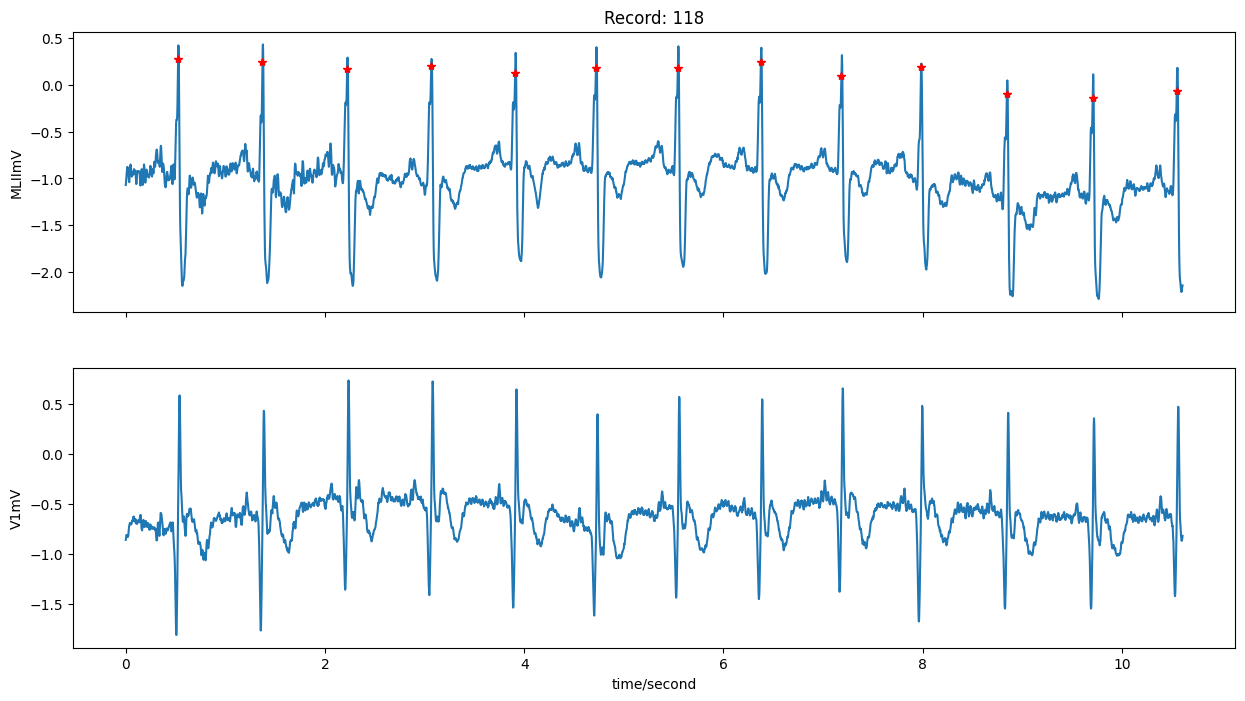

(48, 3820)
[[-0.365 -0.365 -0.36  ... -0.25  -0.25  -0.255]
 [-0.135 -0.125 -0.11  ... -0.39  -0.385 -0.4  ]
 [-0.215 -0.2   -0.195 ...  0.81   0.61   0.295]
 ...
 [-0.205 -0.19  -0.185 ... -0.25  -0.26  -0.235]
 [-0.005  0.005 -0.005 ...  0.1    0.085  0.08 ]
 [-0.13  -0.135 -0.135 ... -0.515 -0.5   -0.505]]


In [18]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# Load the signal
signal_number = 9
filename = f'mit-bih-arrhythmia-database-1.0.0//{str(109 + signal_number)}'
record = wfdb.rdrecord(filename, sampfrom=180, sampto=4000)
annotation = wfdb.rdann(filename, 'atr', sampfrom=180, sampto=4000, shift_samps=True)

# Plot the signal
wfdb.plot_wfdb(record=record, annotation=annotation, time_units='seconds', figsize=(15, 8))

# Extract the signal data
ecg_signal = record.p_signal

# Save the signal data as a .npy file
np.save('ecg_signal_118.npy', ecg_signal)

# Optionally, load and check the saved file to ensure it saved correctly
loaded_signal = np.load('ecg_signals.npy')
print(loaded_signal.shape)
print(loaded_signal)


In [17]:
from tensorflow.keras.models import load_model
import numpy as np

# Load the pre-trained model
model = load_model('C:/Users/dadhanis/Desktop/arrythmia detection/fmodel_new.keras')

# Load and preprocess the ECG signal
ecg_signal = np.load('C:/Users/dadhanis/Desktop/arrythmia detection/ecg_signal_118.npy')
ecg_signal = ecg_signal.reshape(1, -1, 1)
ecg_signal = (ecg_signal - np.mean(ecg_signal)) / np.std(ecg_signal)

# Predict using the model
predictions = model.predict(ecg_signal)
predicted_class = np.argmax(predictions, axis=1)

# Define class labels
class_labels = ['L', 'N', 'R', 'A', 'V', 'F', '/', '+', '~']


# Interpret the result
predicted_label = class_labels[predicted_class[0]]
print(f'Predicted class: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
Predicted class: L


In [21]:
pip install chardet

   ---------------------------------------- 0.0/199.4 kB ? eta -:--:--
   ------ --------------------------------- 30.7/199.4 kB 1.3 MB/s eta 0:00:01
   ---------------------- ----------------- 112.6/199.4 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 199.4/199.4 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
import chardet

# Detect the encoding of the file
file_path = "C:/Users/dadhanis/Desktop/test/fmodel_2(1).keras"

with open(file_path, "rb") as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)

print(result)


{'encoding': None, 'confidence': 0.0, 'language': None}


In [23]:
import json
import chardet

file_path = "C:/Users/dadhanis/Desktop/test/fmodel_2(1).keras"

# Detect the encoding
with open(file_path, "rb") as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

# Read the file with the detected encoding
with open(file_path, "r", encoding=encoding) as f:
    model_config = json.load(f)

print(json.dumps(model_config, indent=4))


UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 7895: character maps to <undefined>

In [24]:
file_path = "C:/Users/dadhanis/Desktop/test/fmodel_2(1).keras"

with open(file_path, "rb") as f:
    # Read the first 100 bytes
    data = f.read(100)
    print(data)


b'PK\x03\x04\x14\x00\x00\x00\x00\x00\x00\x00!\x00/\xbbb\xd1@\x00\x00\x00@\x00\x00\x00\r\x00\x00\x00metadata.json{"keras_version": "2.15.0", "date_saved": "2024-04-01@09:'


In [1]:
import wfdb
import numpy as np
import os

# Directory containing the MIT-BIH Arrhythmia Database records
dataset_dir = 'mit-bih-arrhythmia-database-1.0.0/'

# List of all record numbers in the MIT-BIH Arrhythmia Database
record_numbers = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 200, 201, 202, 203, 205, 207, 208, 209, 210, 212, 213, 214, 215, 217, 219, 220, 221, 222, 223, 228, 230, 231, 232, 233, 234]

# Sample range for extraction
sampfrom = 180
sampto = 4000

# Initialize lists to hold the signals and annotations
signals = []
labels = []

# Iterate through each record number
for record_number in record_numbers:
    filename = os.path.join(dataset_dir, str(record_number))
    
    try:
        # Read the record
        record = wfdb.rdrecord(filename, sampfrom=sampfrom, sampto=sampto)
        
        # Read the annotation
        annotation = wfdb.rdann(filename, 'atr', sampfrom=sampfrom, sampto=sampto, shift_samps=True)
        
        # Extract the signal (assuming a single channel)
        signal = record.p_signal[:,0]  # Adjust the index if there are multiple channels
        
        # Store the signal
        signals.append(signal)
        
        # Extract labels from the annotations
        # For simplicity, assuming 'N' (Normal beat) as label 0 and others as label 1
        label = np.array([1 if atr in ['N', 'L', 'R', 'B'] else 0 for atr in annotation.symbol])
        
        # Store the labels
        labels.append(label)
        
    except Exception as e:
        print(f"Error reading record {record_number}: {e}")

# Convert signals and labels lists to numpy arrays
signals = np.array(signals)
labels = np.hstack(labels)

# Save the labels to a .npy file
np.save('ecg_labels_new.npy', labels)
print(f"Labels saved to 'ecg_labels.npy' file.")

# Optionally, you can save the signals to a .npy file as well
np.save('ecg_signals_new.npy', signals)
print(f"Signals saved to 'ecg_signals.npy' file.")


Labels saved to 'ecg_labels.npy' file.
Signals saved to 'ecg_signals.npy' file.


In [2]:
import wfdb
import numpy as np
import os

# Directory containing the MIT-BIH Arrhythmia Database records
dataset_dir = 'mit-bih-arrhythmia-database-1.0.0/'

# List of all record numbers in the MIT-BIH Arrhythmia Database
record_numbers = [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 200, 201, 202, 203, 205, 207, 208, 209, 210, 212, 213, 214, 215, 217, 219, 220, 221, 222, 223, 228, 230, 231, 232, 233, 234]

# Sample range for extraction
sampfrom = 180
sampto = 4000

# Initialize lists to hold the annotations and labels
annotations = []
labels = []

# Iterate through each record number
for record_number in record_numbers:
    filename = os.path.join(dataset_dir, str(record_number))
    
    try:
        # Read the annotation
        annotation = wfdb.rdann(filename, 'atr', sampfrom=sampfrom, sampto=sampto, shift_samps=True)
        
        # Extract the annotation symbols
        symbols = annotation.symbol
        
        # Extract labels based on heartbeat types
        # For simplicity, assuming 'N' (Normal beat) as label 0 and others as label 1
        label = np.array([0 if sym in ['N', 'L', 'R', 'B'] else 1 for sym in symbols])
        
        # Store the annotation and labels
        annotations.append(annotation)
        labels.append(label)
        
    except Exception as e:
        print(f"Error reading record {record_number}: {e}")

# Concatenate all labels into a single numpy array
labels = np.concatenate(labels)

# Save the labels to a .npy file
np.save('ecg_labels_new1.npy', labels)
print(f"Labels saved to 'ecg_labels.npy' file.")


Labels saved to 'ecg_labels.npy' file.


Generating record list for: 100
Generating list of all files for: 100
Created local base download directory: /path/to/save/data
Finished downloading files


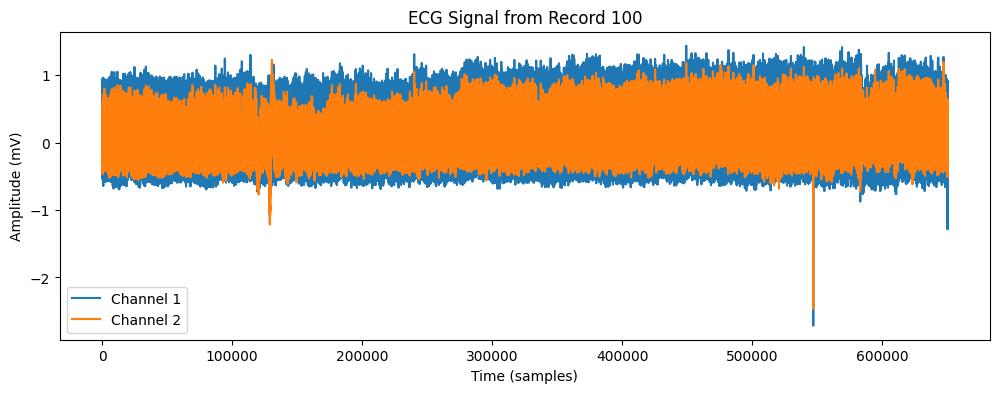

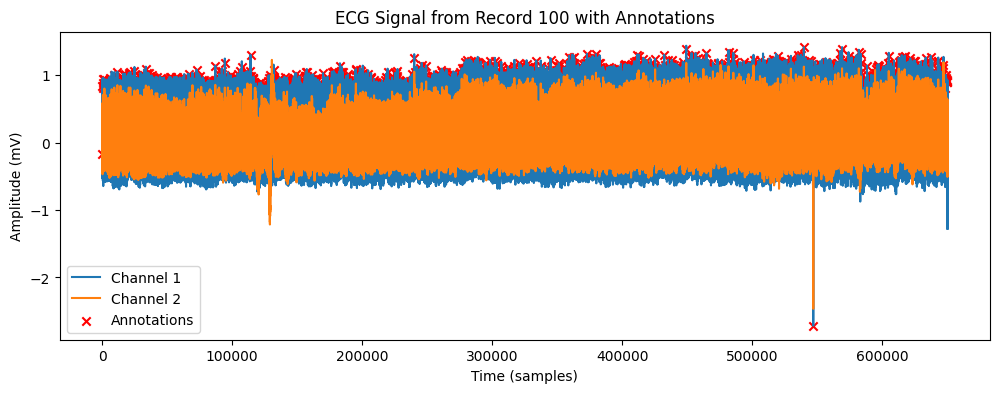

In [1]:
import wfdb
import matplotlib.pyplot as plt

# Download a sample record from the MIT-BIH Arrhythmia Database
record = '100'  # Replace with the record you want to read
wfdb.dl_database('mitdb', '/path/to/save/data', [record])

# Read the record and annotations
record = wfdb.rdrecord(f'/path/to/save/data/{record}')
annotation = wfdb.rdann(f'/path/to/save/data/{record.record_name}', 'atr')

# Plot the ECG signal
plt.figure(figsize=(12, 4))
plt.plot(record.p_signal[:, 0], label='Channel 1')
plt.plot(record.p_signal[:, 1], label='Channel 2')
plt.title(f'ECG Signal from Record {record.record_name}')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()

# Plot the ECG signal with annotations
plt.figure(figsize=(12, 4))
plt.plot(record.p_signal[:, 0], label='Channel 1')
plt.plot(record.p_signal[:, 1], label='Channel 2')
plt.scatter(annotation.sample, [record.p_signal[i, 0] for i in annotation.sample], color='red', label='Annotations', marker='x')
plt.title(f'ECG Signal from Record {record.record_name} with Annotations')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (mV)')
plt.legend()
plt.show()
